# Importing necessary libraries and data

In [ ]:
#!pip install pandas

In [ ]:
#!pip install numpy

In [98]:
import pandas as pd
import numpy as np
import seaborn as ak
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import random
plt.rc("font", size=14)
import math
from sklearn.model_selection import train_test_split

In [128]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [207]:
from sklearn.linear_model import LogisticRegression

In [262]:
!pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [263]:
import researchpy

In [146]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [163]:
from sklearn import metrics

In [174]:
from sklearn.neighbors import KNeighborsClassifier

In [151]:
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
pd.set_option('max_columns', None)

In [ ]:
fifa_data = pd.read_csv("/content/data.csv")

In [ ]:
fifa_data.head(5)

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club                                     Club Logo    Value  \
0         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  €110.5M   
1             Juventus   https://cdn.sofifa.org/teams/2/light/45.png     €77M   
2  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png  €118.5M   
3    Manchester United   https://cdn.sofifa.org/teams/2/light/11.png     €72M   
4      Manchester City   https://cdn.sofifa.org/teams/2/light/10.png    €102M   

    Wage  Special Preferred Foot  International Reputation  Weak Foot  \
0  €565K     2202           Left                       5.0        4.0   
1  €405K     2228          Right                       5.0        4.0   
2  €290K     2143          Right                       5.0        5.0   
3  €260K     1471          Right                       4.0        3.0   
4  €355K     2281          Right                       4.0        5.0   

   Skill Moves       Work Rate   Body Type Real Face Position  Jersey Number  \
0          4.0  Medium/ Medium       Messi       Yes       RF           10.0   
1          5.0       High/ Low  C. Ronaldo       Yes       ST            7.0   
2          5.0    High/ Medium      Neymar       Yes       LW           10.0   
3          1.0  Medium/ Medium        Lean       Yes       GK            1.0   
4          4.0      High/ High      Normal       Yes      RCM            7.0   

         Joined Loaned From Contract Valid Until Height  Weight    LS    ST  \
0   Jul 1, 2004         NaN                 2021    5'7  159lbs  88+2  88+2   
1  Jul 10, 2018         NaN                 2022    6'2  183lbs  91+3  91+3   
2   Aug 3, 2017         NaN                 2022    5'9  150lbs  84+3  84+3   
3   Jul 1, 2011         NaN                 2020    6'4  168lbs   NaN   NaN   
4  Aug 30, 2015         NaN                 2023   5'11  154lbs  82+3  82+3   

     RS    LW    LF    CF    RF    RW   LAM   CAM   RAM    LM   LCM    CM  \
0  88+2  92+2  93+2  93+2  93+2  92+2  93+2  93+2  93+2  91+2  84+2  84+2   
1  91+3  89+3  90+3  90+3  90+3  89+3  88+3  88+3  88+3  88+3  81+3  81+3   
2  84+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  88+3  81+3  81+3   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  82+3  87+3  87+3  87+3  87+3  87+3  88+3  88+3  88+3  88+3  87+3  87+3   

    RCM    RM   LWB   LDM   CDM   RDM   RWB    LB   LCB    CB   RCB    RB  \
0  84+2  91+2  64+2  61+2  61+2  61+2  64+2  59+2  47+2  47+2  47+2  59+2   
1  81+3  88+3  65+3  61+3  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3   
2  81+3  88+3  65+3  60+3  60+3  60+3  65+3  60+3  47+3  47+3  47+3  60+3   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  87+3  88+3  77+3  77+3  77+3  77+3  77+3  73+3  66+3  66+3  66+3  73+3   

   Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
0      84.0       95.0             70.0          90.0     8

In [ ]:
dict(fifa_data.isna().sum())

{'Unnamed: 0': 0,
 'ID': 0,
 'Name': 0,
 'Age': 0,
 'Photo': 0,
 'Nationality': 0,
 'Flag': 0,
 'Overall': 0,
 'Potential': 0,
 'Club': 241,
 'Club Logo': 0,
 'Value': 0,
 'Wage': 0,
 'Special': 0,
 'Preferred Foot': 48,
 'International Reputation': 48,
 'Weak Foot': 48,
 'Skill Moves': 48,
 'Work Rate': 48,
 'Body Type': 48,
 'Real Face': 48,
 'Position': 60,
 'Jersey Number': 60,
 'Joined': 1553,
 'Loaned From': 16943,
 'Contract Valid Until': 289,
 'Height': 48,
 'Weight': 48,
 'LS': 2085,
 'ST': 2085,
 'RS': 2085,
 'LW': 2085,
 'LF': 2085,
 'CF': 2085,
 'RF': 2085,
 'RW': 2085,
 'LAM': 2085,
 'CAM': 2085,
 'RAM': 2085,
 'LM': 2085,
 'LCM': 2085,
 'CM': 2085,
 'RCM': 2085,
 'RM': 2085,
 'LWB': 2085,
 'LDM': 2085,
 'CDM': 2085,
 'RDM': 2085,
 'RWB': 2085,
 'LB': 2085,
 'LCB': 2085,
 'CB': 2085,
 'RCB': 2085,
 'RB': 2085,
 'Crossing': 48,
 'Finishing': 48,
 'HeadingAccuracy': 48,
 'ShortPassing': 48,
 'Volleys': 48,
 'Dribbling': 48,
 'Curve': 48,
 'FKAccuracy': 48,
 'LongPassing': 48

# Data Cleaning and Exploratory Data Analysis

Dropping unnecessary columns such as 'Name', 'Photo', 'Jersey Number'etc

In [ ]:
drop_cols = ['Name', 'Photo','Flag','Club Logo','Real Face','Jersey Number','Loaned From','Unnamed: 0']
fifa_data.drop(drop_cols, inplace=True, axis=1)

In [ ]:
fifa_data['Body Type'].value_counts()

Normal                 10595
Lean                    6417
Stocky                  1140
Messi                      1
C. Ronaldo                 1
Neymar                     1
Courtois                   1
PLAYER_BODY_TYPE_25        1
Shaqiri                    1
Akinfenwa                  1
Name: Body Type, dtype: int64

In [ ]:
fifa_data['Body Type'].mode()[0]

'Normal'

Observation: We can keep 'Normal', 'Lean' and 'Stocky' values, rest values can be replaced with the mode here.

In [ ]:
mode = fifa_data['Body Type'].mode()[0]
def cleanBodyType(x):
  l = ['C. Ronaldo','Messi','Neymar','Courtois','PLAYER_BODY_TYPE_25','Shaqiri','Akinfenwa']
  return mode if x in l else x

In [ ]:
fifa_data['Body Type'] = fifa_data['Body Type'].apply(cleanBodyType)

In [ ]:
fifa_data['Body Type'].value_counts()

Normal    10602
Lean       6417
Stocky     1140
Name: Body Type, dtype: int64

In [ ]:
fifa_data['Joined'].value_counts()

Jul 1, 2018     1538
Jul 1, 2017     1133
Jan 1, 2018      635
Jul 1, 2016      614
Jul 1, 2015      368
                ... 
Jan 4, 2014        1
Apr 20, 2017       1
Nov 10, 2017       1
Dec 11, 2013       1
Jul 4, 2012        1
Name: Joined, Length: 1736, dtype: int64

In [ ]:
def cleanDate(x):
  if type(x) == int:
    return x
  elif type(x) == str:
    return int(x[-4:])

In [ ]:
fifa_data['Joined'] = fifa_data['Joined'].apply(cleanDate)

In [ ]:
fifa_data['Joined'] = fifa_data['Joined'].fillna(fifa_data['Joined'].median())

In [ ]:
fifa_data['Joined'].value_counts()

2018.0    6569
2017.0    5860
2016.0    2246
2015.0    1336
2014.0     818
2013.0     458
2012.0     340
2011.0     201
2010.0     131
2009.0      78
2008.0      53
2007.0      38
2006.0      18
2005.0      17
2003.0      13
2004.0      12
2002.0      10
1998.0       3
2001.0       2
2000.0       2
1991.0       1
1999.0       1
Name: Joined, dtype: int64

In [ ]:
fifa_data['Joined'].isna().sum()

0

In [ ]:
fifa_data['Contract Valid Until'].isna().sum()

289

In [ ]:
fifa_data['Contract Valid Until'].value_counts()

2019            4819
2021            4360
2020            4027
2022            1477
2023            1053
Jun 30, 2019     931
2018             886
Dec 31, 2018     144
May 31, 2019      60
Jan 1, 2019       51
2024              23
Jun 30, 2020      14
Jan 31, 2019      13
2025               7
Jan 5, 2019        6
Jan 2, 2019        6
Jan 12, 2019       5
Oct 14, 2019       5
Jan 6, 2019        4
Dec 31, 2019       3
Jan 25, 2019       3
Jan 7, 2019        3
Dec 1, 2019        2
May 31, 2020       2
2026               2
Nov 30, 2018       2
Jan 15, 2019       1
Feb 27, 2020       1
Jan 30, 2019       1
Jan 11, 2019       1
May 4, 2019        1
Jan 18, 2019       1
Jan 3, 2019        1
Jan 4, 2019        1
Jun 1, 2019        1
Jan 20, 2019       1
Name: Contract Valid Until, dtype: int64

In [ ]:
fifa_data['Contract Valid Until'] = fifa_data['Contract Valid Until'].apply(cleanDate)

In [ ]:
fifa_data['Contract Valid Until'] = fifa_data['Contract Valid Until'].fillna(fifa_data['Contract Valid Until'].median())

In [ ]:
fifa_data['Contract Valid Until'].isna().sum()

0

In [ ]:
fifa_data['Value'].value_counts()

€1.1M      431
€375K      372
€425K      354
€325K      351
€450K      343
          ... 
€36M         1
€43M         1
€46M         1
€59M         1
€110.5M      1
Name: Value, Length: 217, dtype: int64

In [ ]:
def cleanValue(x):
  if type(x) == float:
    return x
  x = x.replace('K','').replace('€','')
  if 'M' in x:
    return float(x.replace('M',''))*1000
  else:
    return float(x)

In [ ]:
currency_cols = ['Value','Wage','Release Clause']
for e in currency_cols:
  fifa_data[e] = fifa_data[e].apply(cleanValue)
fifa_data.tail()

ID  Age Nationality  Overall  Potential              Club  Value  \
18202  238813   19     England       47         65   Crewe Alexandra   60.0   
18203  243165   19      Sweden       47         63    Trelleborgs FF   60.0   
18204  241638   16     England       47         67  Cambridge United   60.0   
18205  246268   17     England       47         66   Tranmere Rovers   60.0   
18206  246269   16     England       46         66   Tranmere Rovers   60.0   

       Wage  Special Preferred Foot  International Reputation  Weak Foot  \
18202   1.0     1307          Right                       1.0        2.0   
18203   1.0     1098          Right                       1.0        2.0   
18204   1.0     1189          Right                       1.0        3.0   
18205   1.0     1228          Right                       1.0        3.0   
18206   1.0     1321          Right                       1.0        3.0   

       Skill Moves       Work Rate Body Type Position  Joined  \
18202          2.0  Medium/ Medium      Lean       CM  2017.0   
18203          2.0  Medium/ Medium    Normal       ST  2018.0   
18204          2.0  Medium/ Medium    Normal       ST  2017.0   
18205          2.0  Medium/ Medium      Lean       RW  2018.0   
18206          2.0  Medium/ Medium      Lean       CM  2018.0   

       Contract Valid Until Height  Weight    LS    ST    RS    LW    LF  \
18202                2019.0    5'9  134lbs  42+2  42+2  42+2  44+2  44+2   
18203                2020.0    6'3  170lbs  45+2  45+2  45+2  39+2  42+2   
18204                2021.0    5'8  148lbs  45+2  45+2  45+2  45+2  46+2   
18205                2019.0   5'10  154lbs  47+2  47+2  47+2  47+2  46+2   
18206                2019.0   5'10  176lbs  43+2  43+2  43+2  45+2  44+2   

         CF    RF    RW   LAM   CAM   RAM    LM   LCM    CM   RCM    RM   LWB  \
18202  44+2  44+2  44+2  45+2  45+2  45+2  44+2  45+2  45+2  45+2  44+2  44+2   
18203  42+2  42+2  39+2  40+2  40+2  40+2  38+2  35+2  35+2  35+2  38+2  30+2   
18204  46+2  46+2  45+2  44+2  44+2  44+2  44+2  38+2  38+2  38+2  44+2  34+2   
18205  46+2  46+2  47+2  45+2  45+2  45+2  46+2  39+2  39+2  39+2  46+2  36+2   
18206  44+2  44+2  45+2  45+2  45+2  45+2  46+2  45+2  45+2  45+2  46+2  46+2   

        LDM   CDM   RDM   RWB    LB   LCB    CB   RCB    RB  Crossing  \
18202  45+2  45+2  45+2  44+2  45+2  45+2  45+2  45+2  45+2      34.0   
18203  31+2  31+2  31+2  30+2  29+2  32+2  32+2  32+2  29+2      23.0   
18204  30+2  30+2  30+2  34+2  33+2  28+2  28+2  28+2  33+2      25.0   
18205  32+2  32+2  32+2  36+2  35+2  31+2  31+2  31+2  35+2      44.0   
18206  46+2  46+2  46+2  46+2  46+2  47+2  47+2  47+2  46+2      41.0   

       Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  \
18202       38.0             40.0          49.0     25.0       42.0   30.0   
18203       52.0             52.0          43.0     36.0       39.0   32.0   
18204       40.0             46.0          38.0     38.0       45.0   38.0   
18205       50.0             39.0          42.0     40.0       51.0   34.0   
18206       34.0             46.0          48.0     30.0       43.0   40.0   

       FKAccuracy  LongPassing  BallControl  Acceleration  SprintSpeed  \
18202        34.0         45.0         43.0          54.0         57.0   
18203        20.0         25.0         40.0          41.0         39.0   
18204        27.0         28.0         44.0          70.0         69.0   
18205        32.0         32.0         52.0          61.0         60.0   
18206        34.0         44.0         51.0          57.0         55.0   

       Agility  Reactions  Balance  ShotPower  Jumping  Stamina  Strength  \
18202     60.0       49.0     76.0       43.0     55.0     40.0      47.0   
18203     38.0       40.0     52.0       41.0     47.0     43.0      67.0   
18204     50.0       47.0     58.0       45.0     60.0     55.0      32.0   
18205     52.0       21.0     71.0       64.0     42.0     40.0      48.0   
18206 

In [ ]:
fifa_data['Weight'].value_counts()

165lbs    1483
154lbs    1439
176lbs    1041
172lbs     987
159lbs     946
161lbs     936
163lbs     901
170lbs     860
168lbs     836
174lbs     705
150lbs     660
157lbs     617
181lbs     584
183lbs     513
179lbs     507
152lbs     506
143lbs     505
187lbs     448
148lbs     435
185lbs     432
146lbs     365
141lbs     322
190lbs     288
194lbs     278
139lbs     206
192lbs     193
137lbs     165
198lbs     156
196lbs     143
132lbs     127
201lbs      93
134lbs      87
203lbs      75
205lbs      60
207lbs      45
209lbs      34
130lbs      33
128lbs      31
212lbs      23
123lbs      18
126lbs      14
214lbs      11
121lbs      10
216lbs       9
117lbs       6
218lbs       5
119lbs       4
223lbs       3
225lbs       3
227lbs       2
236lbs       2
110lbs       2
243lbs       1
220lbs       1
229lbs       1
115lbs       1
234lbs       1
Name: Weight, dtype: int64

In [ ]:
fifa_data['Weight'] = fifa_data['Weight'].str.replace('lbs','').astype(float)
fifa_data.head()

ID  Age Nationality  Overall  Potential                 Club     Value  \
0  158023   31   Argentina       94         94         FC Barcelona  110500.0   
1   20801   33    Portugal       94         94             Juventus   77000.0   
2  190871   26      Brazil       92         93  Paris Saint-Germain  118500.0   
3  193080   27       Spain       91         93    Manchester United   72000.0   
4  192985   27     Belgium       91         92      Manchester City  102000.0   

    Wage  Special Preferred Foot  International Reputation  Weak Foot  \
0  565.0     2202           Left                       5.0        4.0   
1  405.0     2228          Right                       5.0        4.0   
2  290.0     2143          Right                       5.0        5.0   
3  260.0     1471          Right                       4.0        3.0   
4  355.0     2281          Right                       4.0        5.0   

   Skill Moves       Work Rate Body Type Position  Joined  \
0          4.0  Medium/ Medium    Normal       RF  2004.0   
1          5.0       High/ Low    Normal       ST  2018.0   
2          5.0    High/ Medium    Normal       LW  2017.0   
3          1.0  Medium/ Medium      Lean       GK  2011.0   
4          4.0      High/ High    Normal      RCM  2015.0   

   Contract Valid Until Height  Weight    LS    ST    RS    LW    LF    CF  \
0                2021.0    5'7   159.0  88+2  88+2  88+2  92+2  93+2  93+2   
1                2022.0    6'2   183.0  91+3  91+3  91+3  89+3  90+3  90+3   
2                2022.0    5'9   150.0  84+3  84+3  84+3  89+3  89+3  89+3   
3                2020.0    6'4   168.0   NaN   NaN   NaN   NaN   NaN   NaN   
4                2023.0   5'11   154.0  82+3  82+3  82+3  87+3  87+3  87+3   

     RF    RW   LAM   CAM   RAM    LM   LCM    CM   RCM    RM   LWB   LDM  \
0  93+2  92+2  93+2  93+2  93+2  91+2  84+2  84+2  84+2  91+2  64+2  61+2   
1  90+3  89+3  88+3  88+3  88+3  88+3  81+3  81+3  81+3  88+3  65+3  61+3   
2  89+3  89+3  89+3  89+3  89+3  88+3  81+3  81+3  81+3  88+3  65+3  60+3   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  87+3  87+3  88+3  88+3  88+3  88+3  87+3  87+3  87+3  88+3  77+3  77+3   

    CDM   RDM   RWB    LB   LCB    CB   RCB    RB  Crossing  Finishing  \
0  61+2  61+2  64+2  59+2  47+2  47+2  47+2  59+2      84.0       95.0   
1  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3      84.0       94.0   
2  60+3  60+3  65+3  60+3  47+3  47+3  47+3  60+3      79.0       87.0   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN      17.0       13.0   
4  77+3  77+3  77+3  73+3  66+3  66+3  66+3  73+3      93.0       82.0   

   HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  FKAccuracy  \
0             70.0          90.0     86.0       97.0   93.0        94.0   
1             89.0          81.0     87.0       88.0   81.0        76.0   
2             62.0          84.0     84.0       96.0   88.0        87.0   
3             21.0          50.0     13.0       18.0   21.0        19.0   
4             55.0          92.0     82.0       86.0   85.0        83.0   

   LongPassing  BallControl  Acceleration  SprintSpeed  Agility  Reactions  \
0         87.0         96.0          91.0         86.0     91.0       95.0   
1         77.0         94.0          89.0         91.0     87.0       96.0   
2         78.0         95.0          94.0         90.0     96.0       94.0   
3         51.0         42.0          57.0         58.0     60.0       90.0   
4         91.0         91.0          78.0         76.0     79.0       91.0   

   Balance  ShotPower  Jumping  Stamina  Strength  LongShots  Aggression  \
0     95.0       85.0     68.0     72.0      59.0       94.0        48.0   
1     70.0       95.0     95.0     88.0      79.0       93.0        63.0   
2     84.0       80.0     61.0     81.0      49.0       82.0        56.0   
3     43.0       31.0     67.0     43.0      64.0       12.0        38.0   
4     77.0       91.0     63.0     90

In [ ]:
fifa_data['Height'].value_counts()

6'0     2881
5'10    2479
5'9     2238
5'11    2159
6'2     2015
6'1     1908
6'3      990
5'8      946
5'7      905
6'4      749
5'6      316
6'5      246
5'5      145
6'6       93
5'4       30
6'7       21
5'3       18
6'8       10
5'2        5
5'1        3
6'9        2
Name: Height, dtype: int64

In [ ]:
def cleanHeight(x):
  if type(x) == float:
    return x
  if '\'' in x:
    return 12 * float(x[0]) + float(x[2:])
  else:
    return 12*float(x)

In [ ]:
fifa_data['Height'] = fifa_data['Height'].apply(cleanHeight)
fifa_data.head()

ID  Age Nationality  Overall  Potential                 Club     Value  \
0  158023   31   Argentina       94         94         FC Barcelona  110500.0   
1   20801   33    Portugal       94         94             Juventus   77000.0   
2  190871   26      Brazil       92         93  Paris Saint-Germain  118500.0   
3  193080   27       Spain       91         93    Manchester United   72000.0   
4  192985   27     Belgium       91         92      Manchester City  102000.0   

    Wage  Special Preferred Foot  International Reputation  Weak Foot  \
0  565.0     2202           Left                       5.0        4.0   
1  405.0     2228          Right                       5.0        4.0   
2  290.0     2143          Right                       5.0        5.0   
3  260.0     1471          Right                       4.0        3.0   
4  355.0     2281          Right                       4.0        5.0   

   Skill Moves       Work Rate Body Type Position  Joined  \
0          4.0  Medium/ Medium    Normal       RF  2004.0   
1          5.0       High/ Low    Normal       ST  2018.0   
2          5.0    High/ Medium    Normal       LW  2017.0   
3          1.0  Medium/ Medium      Lean       GK  2011.0   
4          4.0      High/ High    Normal      RCM  2015.0   

   Contract Valid Until  Height  Weight    LS    ST    RS    LW    LF    CF  \
0                2021.0    67.0   159.0  88+2  88+2  88+2  92+2  93+2  93+2   
1                2022.0    74.0   183.0  91+3  91+3  91+3  89+3  90+3  90+3   
2                2022.0    69.0   150.0  84+3  84+3  84+3  89+3  89+3  89+3   
3                2020.0    76.0   168.0   NaN   NaN   NaN   NaN   NaN   NaN   
4                2023.0    71.0   154.0  82+3  82+3  82+3  87+3  87+3  87+3   

     RF    RW   LAM   CAM   RAM    LM   LCM    CM   RCM    RM   LWB   LDM  \
0  93+2  92+2  93+2  93+2  93+2  91+2  84+2  84+2  84+2  91+2  64+2  61+2   
1  90+3  89+3  88+3  88+3  88+3  88+3  81+3  81+3  81+3  88+3  65+3  61+3   
2  89+3  89+3  89+3  89+3  89+3  88+3  81+3  81+3  81+3  88+3  65+3  60+3   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  87+3  87+3  88+3  88+3  88+3  88+3  87+3  87+3  87+3  88+3  77+3  77+3   

    CDM   RDM   RWB    LB   LCB    CB   RCB    RB  Crossing  Finishing  \
0  61+2  61+2  64+2  59+2  47+2  47+2  47+2  59+2      84.0       95.0   
1  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3      84.0       94.0   
2  60+3  60+3  65+3  60+3  47+3  47+3  47+3  60+3      79.0       87.0   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN      17.0       13.0   
4  77+3  77+3  77+3  73+3  66+3  66+3  66+3  73+3      93.0       82.0   

   HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  FKAccuracy  \
0             70.0          90.0     86.0       97.0   93.0        94.0   
1             89.0          81.0     87.0       88.0   81.0        76.0   
2             62.0          84.0     84.0       96.0   88.0        87.0   
3             21.0          50.0     13.0       18.0   21.0        19.0   
4             55.0          92.0     82.0       86.0   85.0        83.0   

   LongPassing  BallControl  Acceleration  SprintSpeed  Agility  Reactions  \
0         87.0         96.0          91.0         86.0     91.0       95.0   
1         77.0         94.0          89.0         91.0     87.0       96.0   
2         78.0         95.0          94.0         90.0     96.0       94.0   
3         51.0         42.0          57.0         58.0     60.0       90.0   
4         91.0         91.0          78.0         76.0     79.0       91.0   

   Balance  ShotPower  Jumping  Stamina  Strength  LongShots  Aggression  \
0     95.0       85.0     68.0     72.0      59.0       94.0        48.0   
1     70.0       95.0     95.0     88.0      79.0       93.0        63.0   
2     84.0       80.0     61.0     81.0      49.0       82.0        56.0   
3     43.0       31.0     67.0     43.0      64.0       12.0        38.0   
4     77.0       91.0     63.0 

In [ ]:
fifa_data['Club'].value_counts()

FC Barcelona                 33
Valencia CF                  33
Fortuna Düsseldorf           33
Cardiff City                 33
Rayo Vallecano               33
                             ..
América FC (Minas Gerais)    20
Fluminense                   20
Sligo Rovers                 19
Limerick FC                  19
Derry City                   18
Name: Club, Length: 651, dtype: int64

Observation: Since all clubs have around 18-33 players. We cannot use a mode or median for replacing 241 values. So we will drop these values considering that we have more than 18000 records.

In [ ]:
fifa_data = fifa_data[fifa_data['Club'].notna()]
fifa_data.shape

(17966, 81)

Checking the count of missing values for each column

In [ ]:
dict(fifa_data.isna().sum())

{'ID': 0,
 'Age': 0,
 'Nationality': 0,
 'Overall': 0,
 'Potential': 0,
 'Club': 0,
 'Value': 0,
 'Wage': 0,
 'Special': 0,
 'Preferred Foot': 48,
 'International Reputation': 48,
 'Weak Foot': 48,
 'Skill Moves': 48,
 'Work Rate': 48,
 'Body Type': 48,
 'Position': 48,
 'Joined': 0,
 'Contract Valid Until': 0,
 'Height': 48,
 'Weight': 48,
 'LS': 2040,
 'ST': 2040,
 'RS': 2040,
 'LW': 2040,
 'LF': 2040,
 'CF': 2040,
 'RF': 2040,
 'RW': 2040,
 'LAM': 2040,
 'CAM': 2040,
 'RAM': 2040,
 'LM': 2040,
 'LCM': 2040,
 'CM': 2040,
 'RCM': 2040,
 'RM': 2040,
 'LWB': 2040,
 'LDM': 2040,
 'CDM': 2040,
 'RDM': 2040,
 'RWB': 2040,
 'LB': 2040,
 'LCB': 2040,
 'CB': 2040,
 'RCB': 2040,
 'RB': 2040,
 'Crossing': 48,
 'Finishing': 48,
 'HeadingAccuracy': 48,
 'ShortPassing': 48,
 'Volleys': 48,
 'Dribbling': 48,
 'Curve': 48,
 'FKAccuracy': 48,
 'LongPassing': 48,
 'BallControl': 48,
 'Acceleration': 48,
 'SprintSpeed': 48,
 'Agility': 48,
 'Reactions': 48,
 'Balance': 48,
 'ShotPower': 48,
 'Jumping':

Observation: The attributes 'LS' through 'RB' have consistent number of missing values. Typically, these positions do not belong to a goalkeeper, so we can check the same observations for Position = 'GK'.

In [ ]:
data_gk = fifa_data[fifa_data['Position'] =='GK']
data_gk.shape

(1992, 81)

In [ ]:
data_gk.head(5)

ID  Age Nationality  Overall  Potential               Club    Value  \
3   193080   27       Spain       91         93  Manchester United  72000.0   
9   200389   25    Slovenia       90         93    Atlético Madrid  68000.0   
18  192448   26     Germany       89         92       FC Barcelona  58000.0   
19  192119   26     Belgium       89         90        Real Madrid  53500.0   
22  167495   32     Germany       89         89  FC Bayern München  38000.0   

     Wage  Special Preferred Foot  International Reputation  Weak Foot  \
3   260.0     1471          Right                       4.0        3.0   
9    94.0     1331          Right                       3.0        3.0   
18  240.0     1328          Right                       3.0        4.0   
19  240.0     1311           Left                       4.0        2.0   
22  130.0     1473          Right                       5.0        4.0   

    Skill Moves       Work Rate Body Type Position  Joined  \
3           1.0  Medium/ Medium      Lean       GK  2011.0   
9           1.0  Medium/ Medium    Normal       GK  2014.0   
18          1.0  Medium/ Medium    Normal       GK  2014.0   
19          1.0  Medium/ Medium    Normal       GK  2018.0   
22          1.0  Medium/ Medium    Normal       GK  2011.0   

    Contract Valid Until  Height  Weight   LS   ST   RS   LW   LF   CF   RF  \
3                 2020.0    76.0   168.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
9                 2021.0    74.0   192.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
18                2022.0    74.0   187.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
19                2024.0    78.0   212.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
22                2021.0    76.0   203.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

     RW  LAM  CAM  RAM   LM  LCM   CM  RCM   RM  LWB  LDM  CDM  RDM  RWB   LB  \
3   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
9   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
18  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
19  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
22  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

    LCB   CB  RCB   RB  Crossing  Finishing  HeadingAccuracy  ShortPassing  \
3   NaN  NaN  NaN  NaN      17.0       13.0             21.0          50.0   
9   NaN  NaN  NaN  NaN      13.0       11.0             15.0          29.0   
18  NaN  NaN  NaN  NaN      15.0       14.0             11.0          36.0   
19  NaN  NaN  NaN  NaN      14.0       14.0             13.0          33.0   
22  NaN  NaN  NaN  NaN      15.0       13.0             25.0          55.0   

    Volleys  Dribbling  Curve  FKAccuracy  LongPassing  BallControl  \
3      13.0       18.0   21.0        19.0         51.0         42.0   
9      13.0       12.0   13.0        14.0         26.0         16.0   
18     14.0       17.0   18.0        12.0         42.0         18.0   
19     12.0       13.0   19.0        20.0         35.0         23.0   
22     11.0       30.0   14.0        11.0         59.0         48.0   

    Acceleration  SprintSpeed  Agility  Reactions  Balance  ShotPower  \
3           57.0         58.0     60.0       90.0     43.0       31.0   
9           43.0         60.0     67.0       86.0     49.0       22.0   
18          38.0         50.0     37.0       85.0     43.0       22.0   
19          46.0         52.0     61.0       84.0     45.0       36.0   
22          54.0         60.0     51.0       84.0     35.0       25.0   

    Jumping  Stamina  Strength  LongShots  Aggression  Interceptions  \
3      67.0     43.0      64.0       12.0        38.0           30.0   
9      76.0     41.0      78.0       12.0        34.0           19.0   
18     79.0     35.0      79.0       10.0        43.0           22.0   
19     68.0     38.0      70.0       17.0        23.0           15.0   
22     77.0     43.0      80.0       16.0        29.0     

In [ ]:
print('Number of goalkeepers with missing RB values: ',data_gk['RB'].isna().sum())
print('Number of goalkeepers with missing LS values: ',data_gk['LS'].isna().sum())
print('Number of goalkeepers with missing Release Clause: ',data_gk['Release Clause'].isna().sum())

Number of goalkeepers with missing RB values:  1992
Number of goalkeepers with missing LS values:  1992
Number of goalkeepers with missing Release Clause:  92


Checking count of all the missing values for each column for goalkeeper's data

In [ ]:
dict(data_gk.isna().sum())

{'ID': 0,
 'Age': 0,
 'Nationality': 0,
 'Overall': 0,
 'Potential': 0,
 'Club': 0,
 'Value': 0,
 'Wage': 0,
 'Special': 0,
 'Preferred Foot': 0,
 'International Reputation': 0,
 'Weak Foot': 0,
 'Skill Moves': 0,
 'Work Rate': 0,
 'Body Type': 0,
 'Position': 0,
 'Joined': 0,
 'Contract Valid Until': 0,
 'Height': 0,
 'Weight': 0,
 'LS': 1992,
 'ST': 1992,
 'RS': 1992,
 'LW': 1992,
 'LF': 1992,
 'CF': 1992,
 'RF': 1992,
 'RW': 1992,
 'LAM': 1992,
 'CAM': 1992,
 'RAM': 1992,
 'LM': 1992,
 'LCM': 1992,
 'CM': 1992,
 'RCM': 1992,
 'RM': 1992,
 'LWB': 1992,
 'LDM': 1992,
 'CDM': 1992,
 'RDM': 1992,
 'RWB': 1992,
 'LB': 1992,
 'LCB': 1992,
 'CB': 1992,
 'RCB': 1992,
 'RB': 1992,
 'Crossing': 0,
 'Finishing': 0,
 'HeadingAccuracy': 0,
 'ShortPassing': 0,
 'Volleys': 0,
 'Dribbling': 0,
 'Curve': 0,
 'FKAccuracy': 0,
 'LongPassing': 0,
 'BallControl': 0,
 'Acceleration': 0,
 'SprintSpeed': 0,
 'Agility': 0,
 'Reactions': 0,
 'Balance': 0,
 'ShotPower': 0,
 'Jumping': 0,
 'Stamina': 0,
 'Stre

Observation: 


1.   Since there are 125 missing values for Release Clause out of 2025 players, we can design an algorithm to predict the Release Clause for the players in this case.
2.   We can remove the unnecesssary columns starting from 'LS' through 'RB' as they do not concern goalkeeper's stats.



Columns that require specific attention: Value, Wage, Height, Weight, Release Clause

In [ ]:
positions = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']

Dropping all the position columns from goalkeeper data:

In [ ]:
data_gk.drop(positions, inplace=True, axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
dict(data_gk.isna().sum())

{'ID': 0,
 'Age': 0,
 'Nationality': 0,
 'Overall': 0,
 'Potential': 0,
 'Club': 0,
 'Value': 0,
 'Wage': 0,
 'Special': 0,
 'Preferred Foot': 0,
 'International Reputation': 0,
 'Weak Foot': 0,
 'Skill Moves': 0,
 'Work Rate': 0,
 'Body Type': 0,
 'Position': 0,
 'Joined': 0,
 'Contract Valid Until': 0,
 'Height': 0,
 'Weight': 0,
 'Crossing': 0,
 'Finishing': 0,
 'HeadingAccuracy': 0,
 'ShortPassing': 0,
 'Volleys': 0,
 'Dribbling': 0,
 'Curve': 0,
 'FKAccuracy': 0,
 'LongPassing': 0,
 'BallControl': 0,
 'Acceleration': 0,
 'SprintSpeed': 0,
 'Agility': 0,
 'Reactions': 0,
 'Balance': 0,
 'ShotPower': 0,
 'Jumping': 0,
 'Stamina': 0,
 'Strength': 0,
 'LongShots': 0,
 'Aggression': 0,
 'Interceptions': 0,
 'Positioning': 0,
 'Vision': 0,
 'Penalties': 0,
 'Composure': 0,
 'Marking': 0,
 'StandingTackle': 0,
 'SlidingTackle': 0,
 'GKDiving': 0,
 'GKHandling': 0,
 'GKKicking': 0,
 'GKPositioning': 0,
 'GKReflexes': 0,
 'Release Clause': 92}

In [ ]:
data_gk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 3 to 18198
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        1992 non-null   int64  
 1   Age                       1992 non-null   int64  
 2   Nationality               1992 non-null   object 
 3   Overall                   1992 non-null   int64  
 4   Potential                 1992 non-null   int64  
 5   Club                      1992 non-null   object 
 6   Value                     1992 non-null   float64
 7   Wage                      1992 non-null   float64
 8   Special                   1992 non-null   int64  
 9   Preferred Foot            1992 non-null   object 
 10  International Reputation  1992 non-null   float64
 11  Weak Foot                 1992 non-null   float64
 12  Skill Moves               1992 non-null   float64
 13  Work Rate                 1992 non-null   object 
 14  Body Ty

Shape of non-goalkeeper data:  (15974, 81)


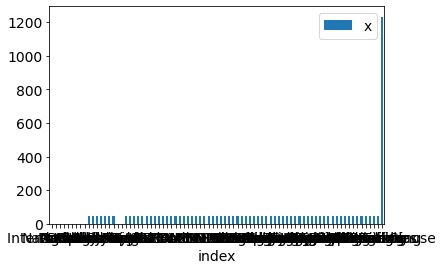

In [ ]:
data_non_gk = fifa_data[fifa_data['Position'] !='GK']
print("Shape of non-goalkeeper data: ",data_non_gk.shape)
data_non_gk.isna().sum().reset_index(name="x").plot.bar(x='index', y='x', rot=1800)

In [ ]:
print('Missing values count for non-goalkeeper dataset: ')
dict(data_non_gk.isna().sum())

Missing values count for non-goalkeeper dataset: 


{'ID': 0,
 'Age': 0,
 'Nationality': 0,
 'Overall': 0,
 'Potential': 0,
 'Club': 0,
 'Value': 0,
 'Wage': 0,
 'Special': 0,
 'Preferred Foot': 48,
 'International Reputation': 48,
 'Weak Foot': 48,
 'Skill Moves': 48,
 'Work Rate': 48,
 'Body Type': 48,
 'Position': 48,
 'Joined': 0,
 'Contract Valid Until': 0,
 'Height': 48,
 'Weight': 48,
 'LS': 48,
 'ST': 48,
 'RS': 48,
 'LW': 48,
 'LF': 48,
 'CF': 48,
 'RF': 48,
 'RW': 48,
 'LAM': 48,
 'CAM': 48,
 'RAM': 48,
 'LM': 48,
 'LCM': 48,
 'CM': 48,
 'RCM': 48,
 'RM': 48,
 'LWB': 48,
 'LDM': 48,
 'CDM': 48,
 'RDM': 48,
 'RWB': 48,
 'LB': 48,
 'LCB': 48,
 'CB': 48,
 'RCB': 48,
 'RB': 48,
 'Crossing': 48,
 'Finishing': 48,
 'HeadingAccuracy': 48,
 'ShortPassing': 48,
 'Volleys': 48,
 'Dribbling': 48,
 'Curve': 48,
 'FKAccuracy': 48,
 'LongPassing': 48,
 'BallControl': 48,
 'Acceleration': 48,
 'SprintSpeed': 48,
 'Agility': 48,
 'Reactions': 48,
 'Balance': 48,
 'ShotPower': 48,
 'Jumping': 48,
 'Stamina': 48,
 'Strength': 48,
 'LongShots': 

Observation: We can remove the missing values in this case since our data is large.

In [ ]:
data_non_gk = data_non_gk[data_non_gk['Position'].notna()]
print(data_non_gk.shape)
print('Missing values count for non-goalkeeper dataset: ')
dict(data_non_gk.isna().sum())

(15926, 81)
Missing values count for non-goalkeeper dataset: 


{'ID': 0,
 'Age': 0,
 'Nationality': 0,
 'Overall': 0,
 'Potential': 0,
 'Club': 0,
 'Value': 0,
 'Wage': 0,
 'Special': 0,
 'Preferred Foot': 0,
 'International Reputation': 0,
 'Weak Foot': 0,
 'Skill Moves': 0,
 'Work Rate': 0,
 'Body Type': 0,
 'Position': 0,
 'Joined': 0,
 'Contract Valid Until': 0,
 'Height': 0,
 'Weight': 0,
 'LS': 0,
 'ST': 0,
 'RS': 0,
 'LW': 0,
 'LF': 0,
 'CF': 0,
 'RF': 0,
 'RW': 0,
 'LAM': 0,
 'CAM': 0,
 'RAM': 0,
 'LM': 0,
 'LCM': 0,
 'CM': 0,
 'RCM': 0,
 'RM': 0,
 'LWB': 0,
 'LDM': 0,
 'CDM': 0,
 'RDM': 0,
 'RWB': 0,
 'LB': 0,
 'LCB': 0,
 'CB': 0,
 'RCB': 0,
 'RB': 0,
 'Crossing': 0,
 'Finishing': 0,
 'HeadingAccuracy': 0,
 'ShortPassing': 0,
 'Volleys': 0,
 'Dribbling': 0,
 'Curve': 0,
 'FKAccuracy': 0,
 'LongPassing': 0,
 'BallControl': 0,
 'Acceleration': 0,
 'SprintSpeed': 0,
 'Agility': 0,
 'Reactions': 0,
 'Balance': 0,
 'ShotPower': 0,
 'Jumping': 0,
 'Stamina': 0,
 'Strength': 0,
 'LongShots': 0,
 'Aggression': 0,
 'Interceptions': 0,
 'Positionin

In [ ]:
data_non_gk.head(5)

ID  Age Nationality  Overall  Potential                 Club     Value  \
0  158023   31   Argentina       94         94         FC Barcelona  110500.0   
1   20801   33    Portugal       94         94             Juventus   77000.0   
2  190871   26      Brazil       92         93  Paris Saint-Germain  118500.0   
4  192985   27     Belgium       91         92      Manchester City  102000.0   
5  183277   27     Belgium       91         91              Chelsea   93000.0   

    Wage  Special Preferred Foot  International Reputation  Weak Foot  \
0  565.0     2202           Left                       5.0        4.0   
1  405.0     2228          Right                       5.0        4.0   
2  290.0     2143          Right                       5.0        5.0   
4  355.0     2281          Right                       4.0        5.0   
5  340.0     2142          Right                       4.0        4.0   

   Skill Moves       Work Rate Body Type Position  Joined  \
0          4.0  Medium/ Medium    Normal       RF  2004.0   
1          5.0       High/ Low    Normal       ST  2018.0   
2          5.0    High/ Medium    Normal       LW  2017.0   
4          4.0      High/ High    Normal      RCM  2015.0   
5          4.0    High/ Medium    Normal       LF  2012.0   

   Contract Valid Until  Height  Weight    LS    ST    RS    LW    LF    CF  \
0                2021.0    67.0   159.0  88+2  88+2  88+2  92+2  93+2  93+2   
1                2022.0    74.0   183.0  91+3  91+3  91+3  89+3  90+3  90+3   
2                2022.0    69.0   150.0  84+3  84+3  84+3  89+3  89+3  89+3   
4                2023.0    71.0   154.0  82+3  82+3  82+3  87+3  87+3  87+3   
5                2020.0    68.0   163.0  83+3  83+3  83+3  89+3  88+3  88+3   

     RF    RW   LAM   CAM   RAM    LM   LCM    CM   RCM    RM   LWB   LDM  \
0  93+2  92+2  93+2  93+2  93+2  91+2  84+2  84+2  84+2  91+2  64+2  61+2   
1  90+3  89+3  88+3  88+3  88+3  88+3  81+3  81+3  81+3  88+3  65+3  61+3   
2  89+3  89+3  89+3  89+3  89+3  88+3  81+3  81+3  81+3  88+3  65+3  60+3   
4  87+3  87+3  88+3  88+3  88+3  88+3  87+3  87+3  87+3  88+3  77+3  77+3   
5  88+3  89+3  89+3  89+3  89+3  89+3  82+3  82+3  82+3  89+3  66+3  63+3   

    CDM   RDM   RWB    LB   LCB    CB   RCB    RB  Crossing  Finishing  \
0  61+2  61+2  64+2  59+2  47+2  47+2  47+2  59+2      84.0       95.0   
1  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3      84.0       94.0   
2  60+3  60+3  65+3  60+3  47+3  47+3  47+3  60+3      79.0       87.0   
4  77+3  77+3  77+3  73+3  66+3  66+3  66+3  73+3      93.0       82.0   
5  63+3  63+3  66+3  60+3  49+3  49+3  49+3  60+3      81.0       84.0   

   HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  FKAccuracy  \
0             70.0          90.0     86.0       97.0   93.0        94.0   
1             89.0          81.0     87.0       88.0   81.0        76.0   
2             62.0          84.0     84.0       96.0   88.0        87.0   
4             55.0          92.0     82.0       86.0   85.0        83.0   
5             61.0          89.0     80.0       95.0   83.0        79.0   

   LongPassing  BallControl  Acceleration  SprintSpeed  Agility  Reactions  \
0         87.0         96.0          91.0         86.0     91.0       95.0   
1         77.0         94.0          89.0         91.0     87.0       96.0   
2         78.0         95.0          94.0         90.0     96.0       94.0   
4         91.0         91.0          78.0         76.0     79.0       91.0   
5         83.0         94.0          94.0         88.0     95.0       90.0   

   Balance  ShotPower  Jumping  Stamina  Strength  LongShots  Aggression  \
0     95.0       85.0     68.0     72.0      59.0       94.0        48.0   
1     70.0       95.0     95.0     88.0      79.0       93.0        63.0   
2     84.0       80.0     61.0     81.0      49.0       82.0        56.0   
4     77.0       91.0     63.0     90.0      75.0       91.0        76.0   
5     94.0       82.0     56.0 

In [ ]:
def cleanRating(x):
  if type(x) == float:
    return x
  else:
    return float(x.split('+')[0])

In [ ]:
for i in positions:
  data_non_gk[i] = data_non_gk[i].apply(cleanRating)
data_non_gk.head()

ID  Age Nationality  Overall  Potential                 Club     Value  \
0  158023   31   Argentina       94         94         FC Barcelona  110500.0   
1   20801   33    Portugal       94         94             Juventus   77000.0   
2  190871   26      Brazil       92         93  Paris Saint-Germain  118500.0   
4  192985   27     Belgium       91         92      Manchester City  102000.0   
5  183277   27     Belgium       91         91              Chelsea   93000.0   

    Wage  Special Preferred Foot  International Reputation  Weak Foot  \
0  565.0     2202           Left                       5.0        4.0   
1  405.0     2228          Right                       5.0        4.0   
2  290.0     2143          Right                       5.0        5.0   
4  355.0     2281          Right                       4.0        5.0   
5  340.0     2142          Right                       4.0        4.0   

   Skill Moves       Work Rate Body Type Position  Joined  \
0          4.0  Medium/ Medium    Normal       RF  2004.0   
1          5.0       High/ Low    Normal       ST  2018.0   
2          5.0    High/ Medium    Normal       LW  2017.0   
4          4.0      High/ High    Normal      RCM  2015.0   
5          4.0    High/ Medium    Normal       LF  2012.0   

   Contract Valid Until  Height  Weight    LS    ST    RS    LW    LF    CF  \
0                2021.0    67.0   159.0  88.0  88.0  88.0  92.0  93.0  93.0   
1                2022.0    74.0   183.0  91.0  91.0  91.0  89.0  90.0  90.0   
2                2022.0    69.0   150.0  84.0  84.0  84.0  89.0  89.0  89.0   
4                2023.0    71.0   154.0  82.0  82.0  82.0  87.0  87.0  87.0   
5                2020.0    68.0   163.0  83.0  83.0  83.0  89.0  88.0  88.0   

     RF    RW   LAM   CAM   RAM    LM   LCM    CM   RCM    RM   LWB   LDM  \
0  93.0  92.0  93.0  93.0  93.0  91.0  84.0  84.0  84.0  91.0  64.0  61.0   
1  90.0  89.0  88.0  88.0  88.0  88.0  81.0  81.0  81.0  88.0  65.0  61.0   
2  89.0  89.0  89.0  89.0  89.0  88.0  81.0  81.0  81.0  88.0  65.0  60.0   
4  87.0  87.0  88.0  88.0  88.0  88.0  87.0  87.0  87.0  88.0  77.0  77.0   
5  88.0  89.0  89.0  89.0  89.0  89.0  82.0  82.0  82.0  89.0  66.0  63.0   

    CDM   RDM   RWB    LB   LCB    CB   RCB    RB  Crossing  Finishing  \
0  61.0  61.0  64.0  59.0  47.0  47.0  47.0  59.0      84.0       95.0   
1  61.0  61.0  65.0  61.0  53.0  53.0  53.0  61.0      84.0       94.0   
2  60.0  60.0  65.0  60.0  47.0  47.0  47.0  60.0      79.0       87.0   
4  77.0  77.0  77.0  73.0  66.0  66.0  66.0  73.0      93.0       82.0   
5  63.0  63.0  66.0  60.0  49.0  49.0  49.0  60.0      81.0       84.0   

   HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  FKAccuracy  \
0             70.0          90.0     86.0       97.0   93.0        94.0   
1             89.0          81.0     87.0       88.0   81.0        76.0   
2             62.0          84.0     84.0       96.0   88.0        87.0   
4             55.0          92.0     82.0       86.0   85.0        83.0   
5             61.0          89.0     80.0       95.0   83.0        79.0   

   LongPassing  BallControl  Acceleration  SprintSpeed  Agility  Reactions  \
0         87.0         96.0          91.0         86.0     91.0       95.0   
1         77.0         94.0          89.0         91.0     87.0       96.0   
2         78.0         95.0          94.0         90.0     96.0       94.0   
4         91.0         91.0          78.0         76.0     79.0       91.0   
5         83.0         94.0          94.0         88.0     95.0       90.0   

   Balance  ShotPower  Jumping  Stamina  Strength  LongShots  Aggression  \
0     95.0       85.0     68.0     72.0      59.0       94.0        48.0   
1     70.0       95.0     95.0     88.0      79.0       93.0        63.0   
2     84.0       80.0     61.0     81.0      49.0       82.0        56.0   
4     77.0       91.0     63.0     90.0      75.0       91.0        76.0   
5     94.0       82.0     56.0 

# Visualization of Exploratory Data Analysis

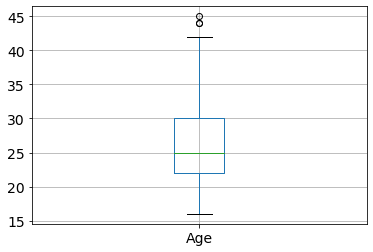

In [ ]:
data_gk[['Age']].boxplot()

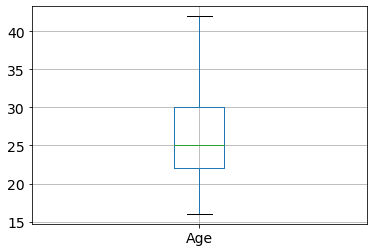

In [ ]:
data_gk = data_gk[data_gk['Age'] <= 42]
data_gk[['Age']].boxplot()

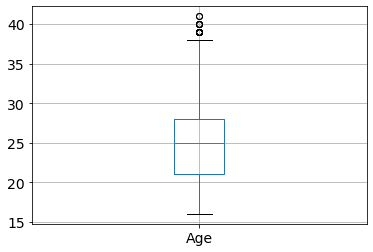

In [ ]:
data_non_gk[['Age']].boxplot()

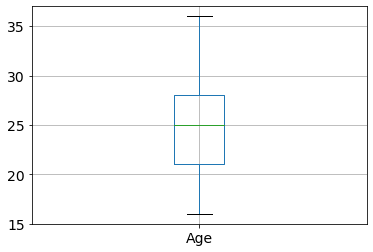

In [ ]:
data_non_gk = data_non_gk[data_non_gk['Age'] <= 36]
data_non_gk[['Age']].boxplot()

Observation: Upper bound outliers found. We had to remove these values from our dataset.

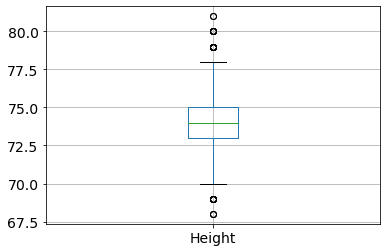

In [ ]:
data_gk[['Height']].boxplot()

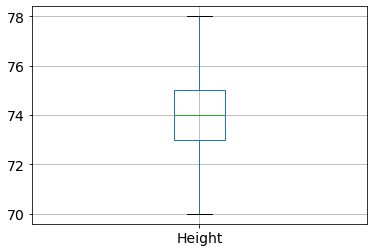

In [ ]:
data_gk =  data_gk[(data_gk['Height'] <= 78 )& (data_gk['Height'] >= 70)]
data_gk[['Height']].boxplot()

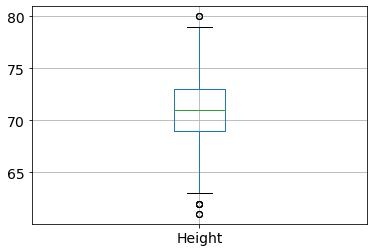

In [ ]:
data_non_gk[['Height']].boxplot()

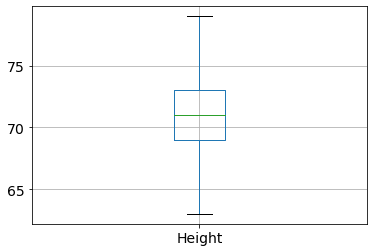

In [ ]:
data_non_gk =  data_non_gk[(data_non_gk['Height'] <= 79 )& (data_non_gk['Height'] >= 62.5)]
data_non_gk[['Height']].boxplot()

Observation: Upper and Lower bound outliers found. We had to remove these values from our dataset.

In [ ]:
data_gk['Weight'].describe()

count    1960.000000
mean      180.633163
std        13.633189
min       132.000000
25%       172.000000
50%       181.000000
75%       190.000000
max       236.000000
Name: Weight, dtype: float64

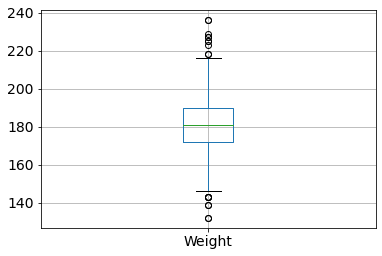

In [ ]:
data_gk[['Weight']].boxplot()

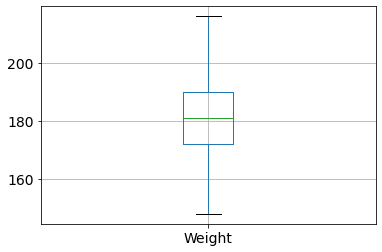

In [ ]:
mingk = data_gk['Weight'].quantile(.005)
maxgk = data_gk['Weight'].quantile(.995)
data_gk =  data_gk[(data_gk['Weight'] <= maxgk )& (data_gk['Weight'] >= mingk)]
data_gk[['Weight']].boxplot()

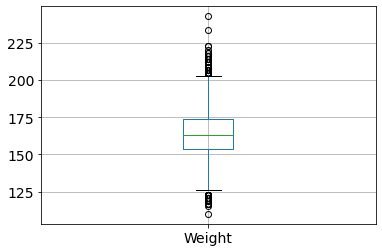

In [ ]:
data_non_gk[['Weight']].boxplot()

128.0 201.0


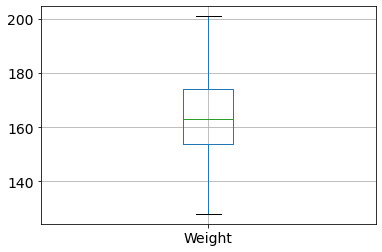

In [ ]:
minngk = data_non_gk['Weight'].quantile(.005)
maxngk = data_non_gk['Weight'].quantile(.990)
print(minngk,maxngk)
data_non_gk =  data_non_gk[(data_non_gk['Weight'] <= maxngk )& (data_non_gk['Weight'] >= minngk)]
data_non_gk[['Weight']].boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb874fcefd0>,
      dtype=object)

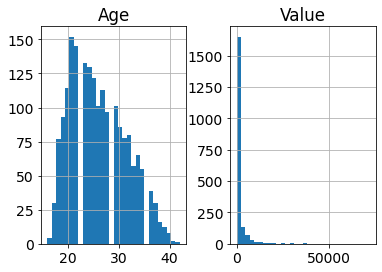

In [ ]:
data_gk.hist(column=['Age','Value'], bins = 30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb874e4c7d0>,
      dtype=object)

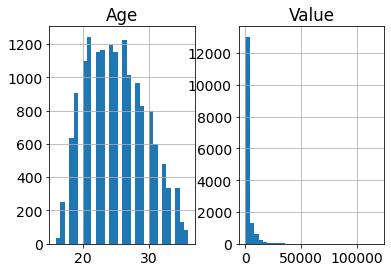

In [ ]:
data_non_gk.hist(column=['Age','Value'], bins = 30)

Observation: We can observe the distribution of goalkeepers and non-goalkeepers as per their age with most of them lying in the age group 20-30.

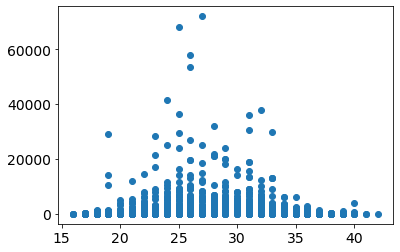

In [ ]:
plt.scatter(data_gk['Age'],data_gk['Value'])

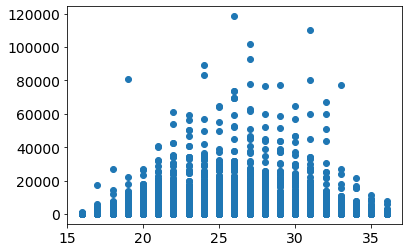

In [ ]:
plt.scatter(data_non_gk['Age'],data_non_gk['Value'])

Observation: We can interpret that the clubs invest more in players that are in the age group 18-33. Based on our domain knowledge, it is only practical that after the age of 33, the focus shifts towards potential replacements for old players.

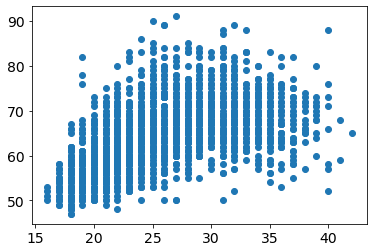

In [ ]:
plt.scatter(data_gk['Age'],data_gk['Overall'])

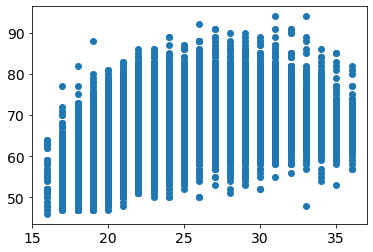

In [ ]:
plt.scatter(data_non_gk['Age'],data_non_gk['Overall'])

Observation: No clear correlation of Age and Overall rating of the players as compared to that of age.

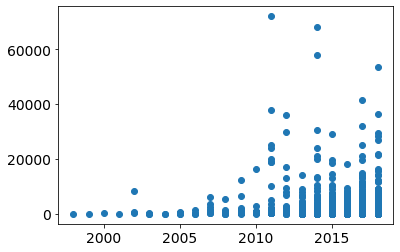

In [ ]:
plt.scatter(data_gk['Joined'],data_gk['Value'])

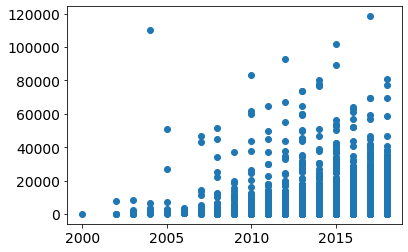

In [ ]:
plt.scatter(data_non_gk['Joined'],data_non_gk['Value'])

Observation: This helps us understand a pattern that more players are highly paid when they join a new club nowadays as compared to past decade.

In [ ]:
dict(data_gk['Nationality'].value_counts())

{'England': 166,
 'Germany': 162,
 'Spain': 116,
 'France': 101,
 'Argentina': 96,
 'Italy': 92,
 'United States': 69,
 'Brazil': 68,
 'Japan': 61,
 'Poland': 59,
 'Netherlands': 53,
 'Colombia': 52,
 'China PR': 51,
 'Turkey': 47,
 'Sweden': 45,
 'Mexico': 45,
 'Austria': 44,
 'Saudi Arabia': 43,
 'Korea Republic': 40,
 'Belgium': 40,
 'Republic of Ireland': 37,
 'Chile': 36,
 'Denmark': 35,
 'Switzerland': 33,
 'Portugal': 32,
 'Norway': 29,
 'Australia': 28,
 'Scotland': 20,
 'Greece': 17,
 'Czech Republic': 15,
 'Wales': 14,
 'Slovakia': 14,
 'Russia': 13,
 'Uruguay': 11,
 'Ukraine': 10,
 'Croatia': 10,
 'Serbia': 8,
 'Finland': 7,
 'Northern Ireland': 7,
 'Canada': 6,
 'New Zealand': 6,
 'Senegal': 6,
 'Cameroon': 5,
 'Algeria': 5,
 'Slovenia': 5,
 'Morocco': 5,
 'Bosnia Herzegovina': 5,
 'South Africa': 4,
 'Romania': 4,
 'Ghana': 4,
 'FYR Macedonia': 3,
 'Hungary': 3,
 'Iran': 3,
 'Venezuela': 3,
 'Montenegro': 3,
 'Ivory Coast': 2,
 'Mali': 2,
 'DR Congo': 2,
 'Estonia': 2,
 'B

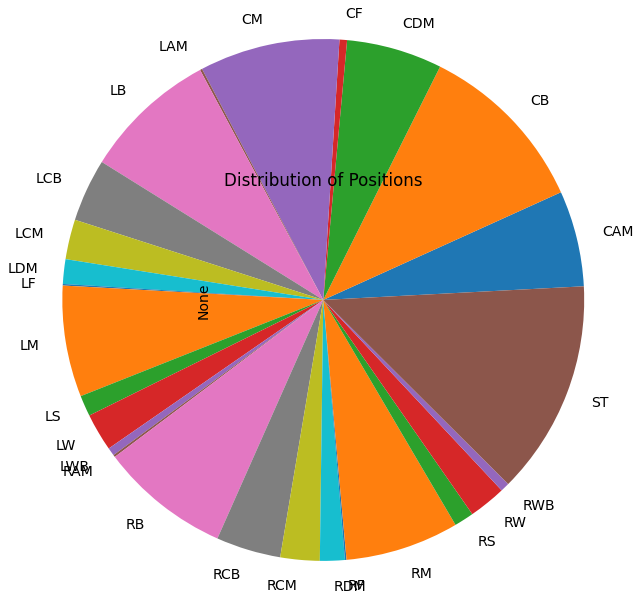

In [ ]:
pos = data_non_gk.groupby('Position')
pos.size().plot(kind='pie', radius = 3, startangle = 3, title = 'Distribution of Positions')

We can observe a majority of ST (Strikers), CB (Cornerbacks) and CM (Central Midfielder) in the data, but the data has a wide range of other positions, so the distribution is random.

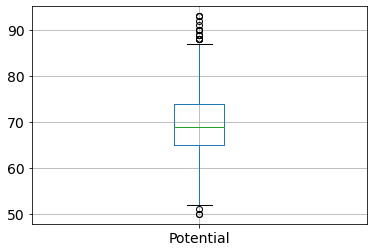

In [ ]:
data_gk[['Potential']].boxplot()

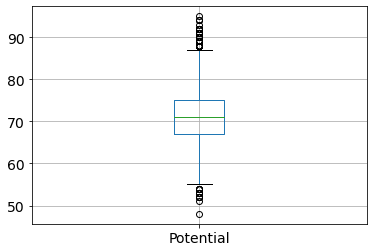

In [ ]:
data_non_gk[['Potential']].boxplot()

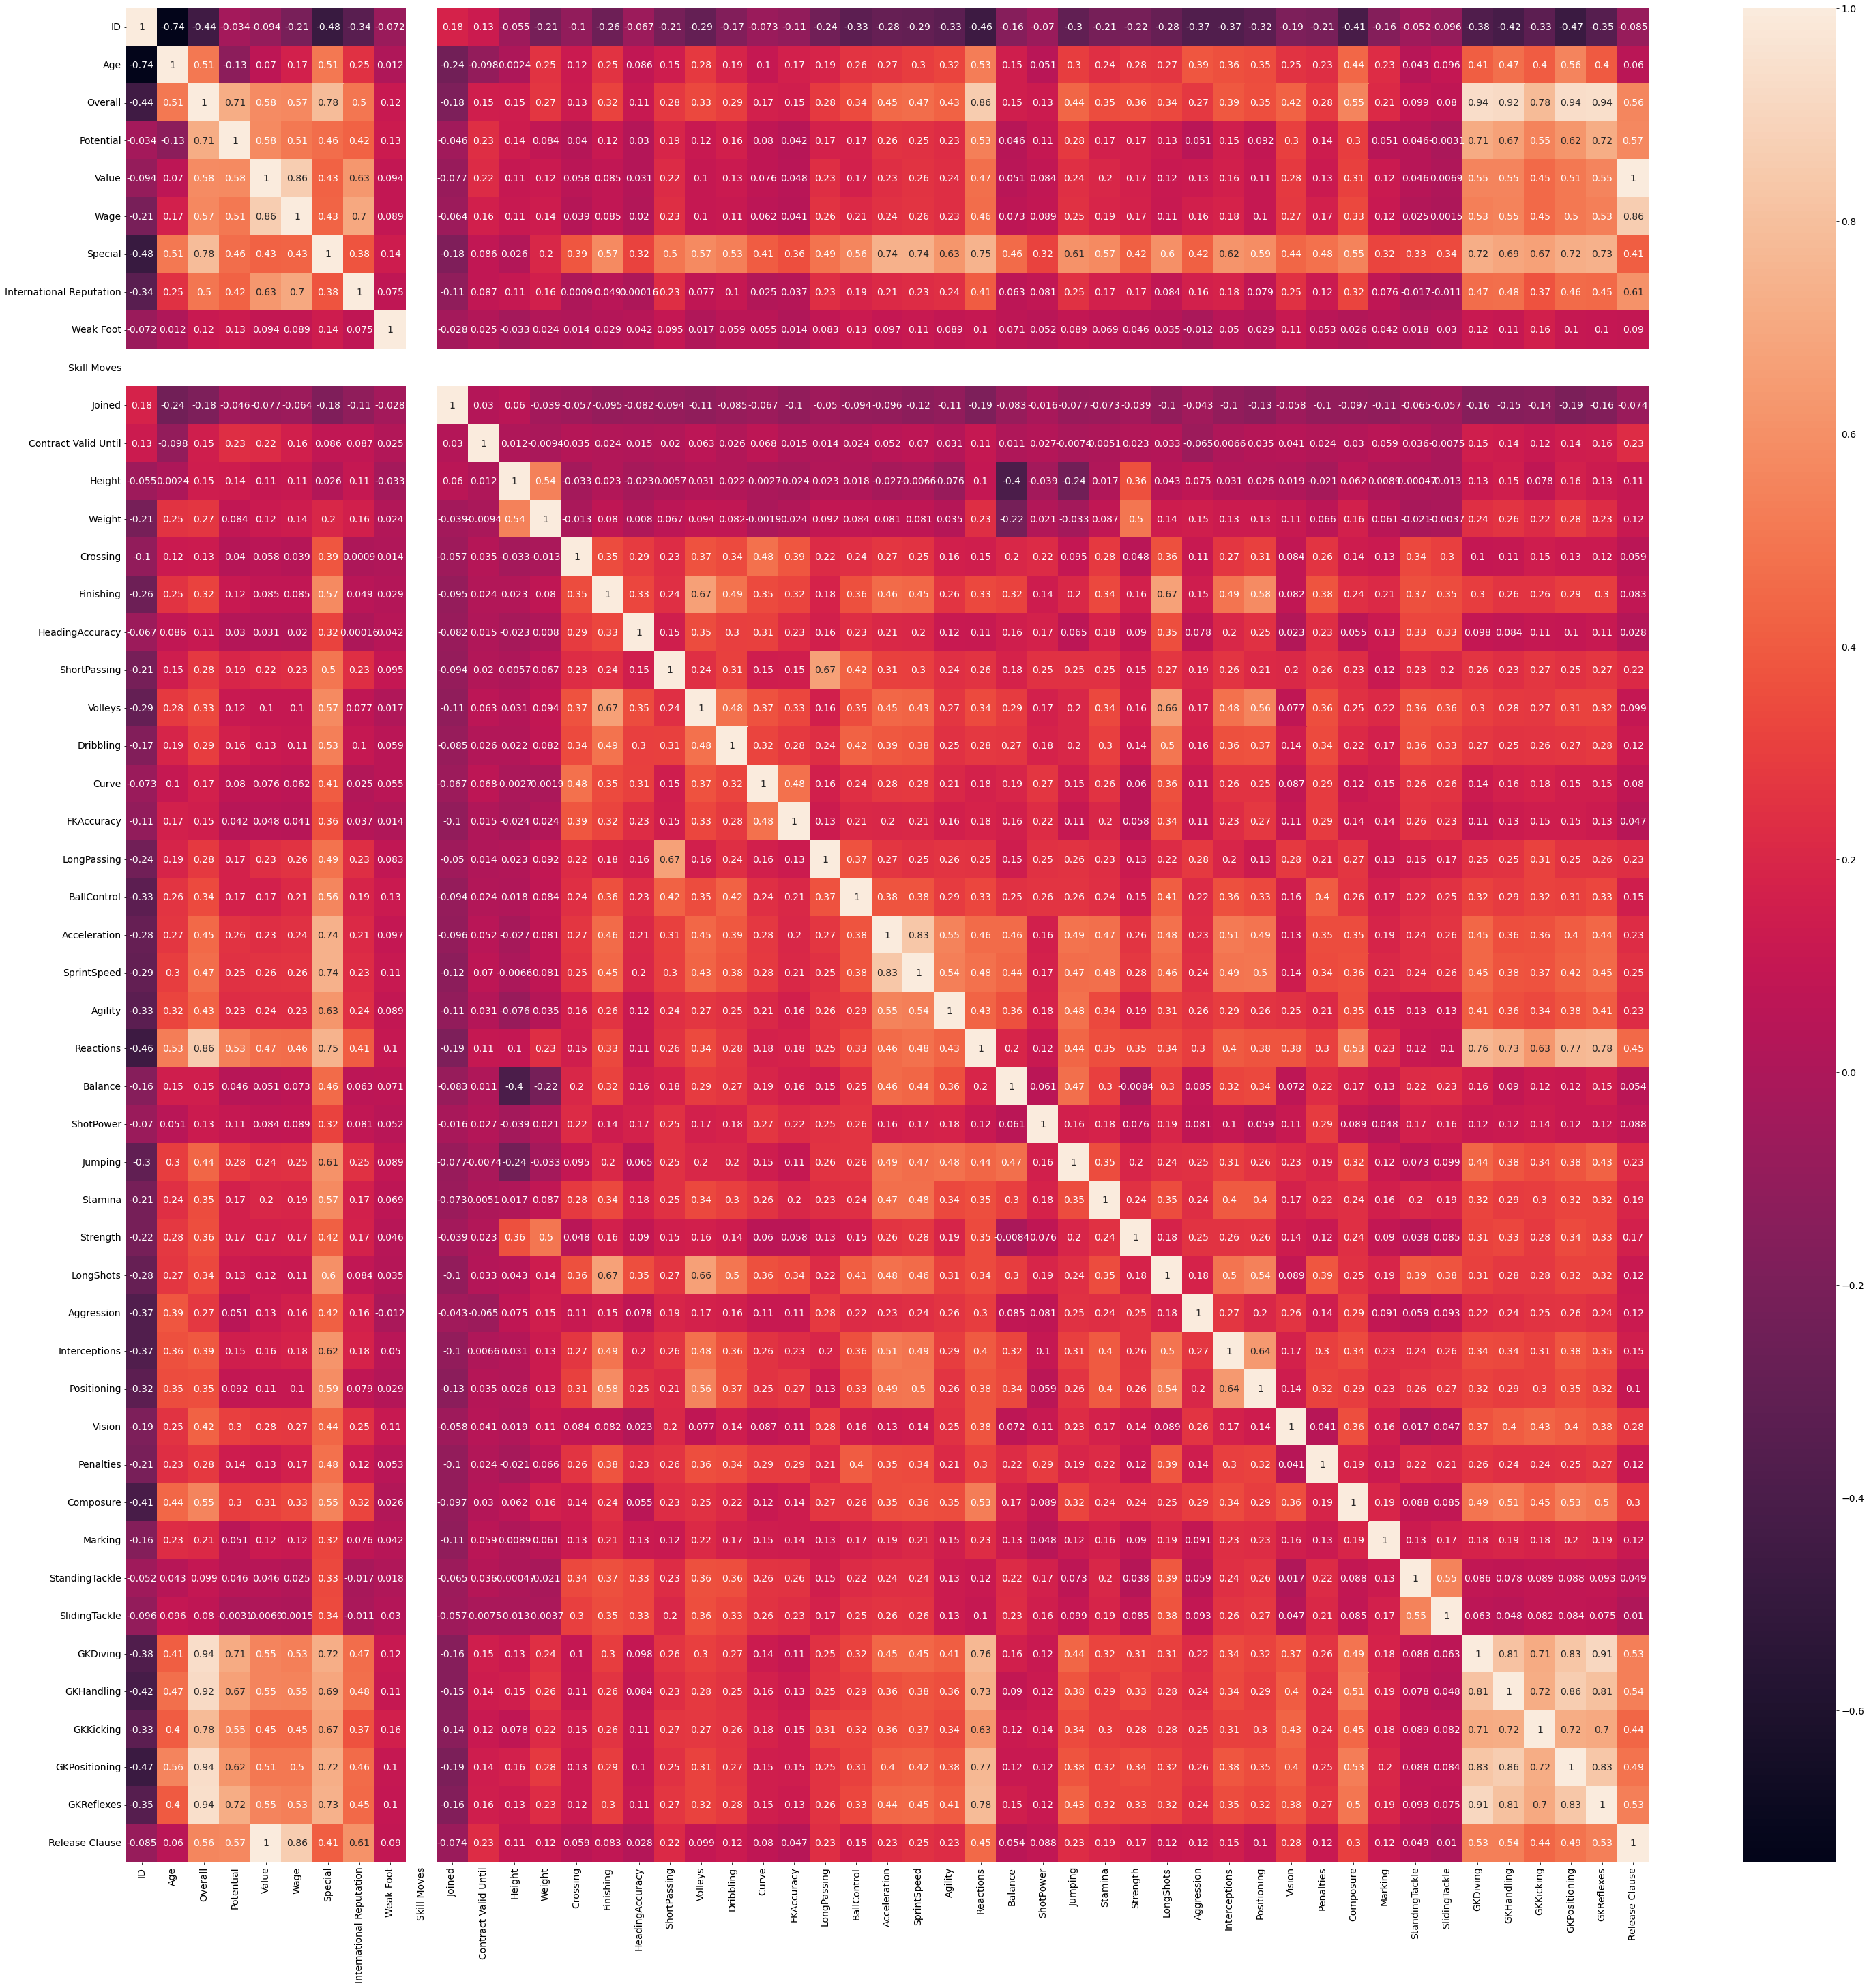

In [ ]:
plt.figure(figsize = (50,50))
ak.heatmap(data_gk.corr(), annot=True)

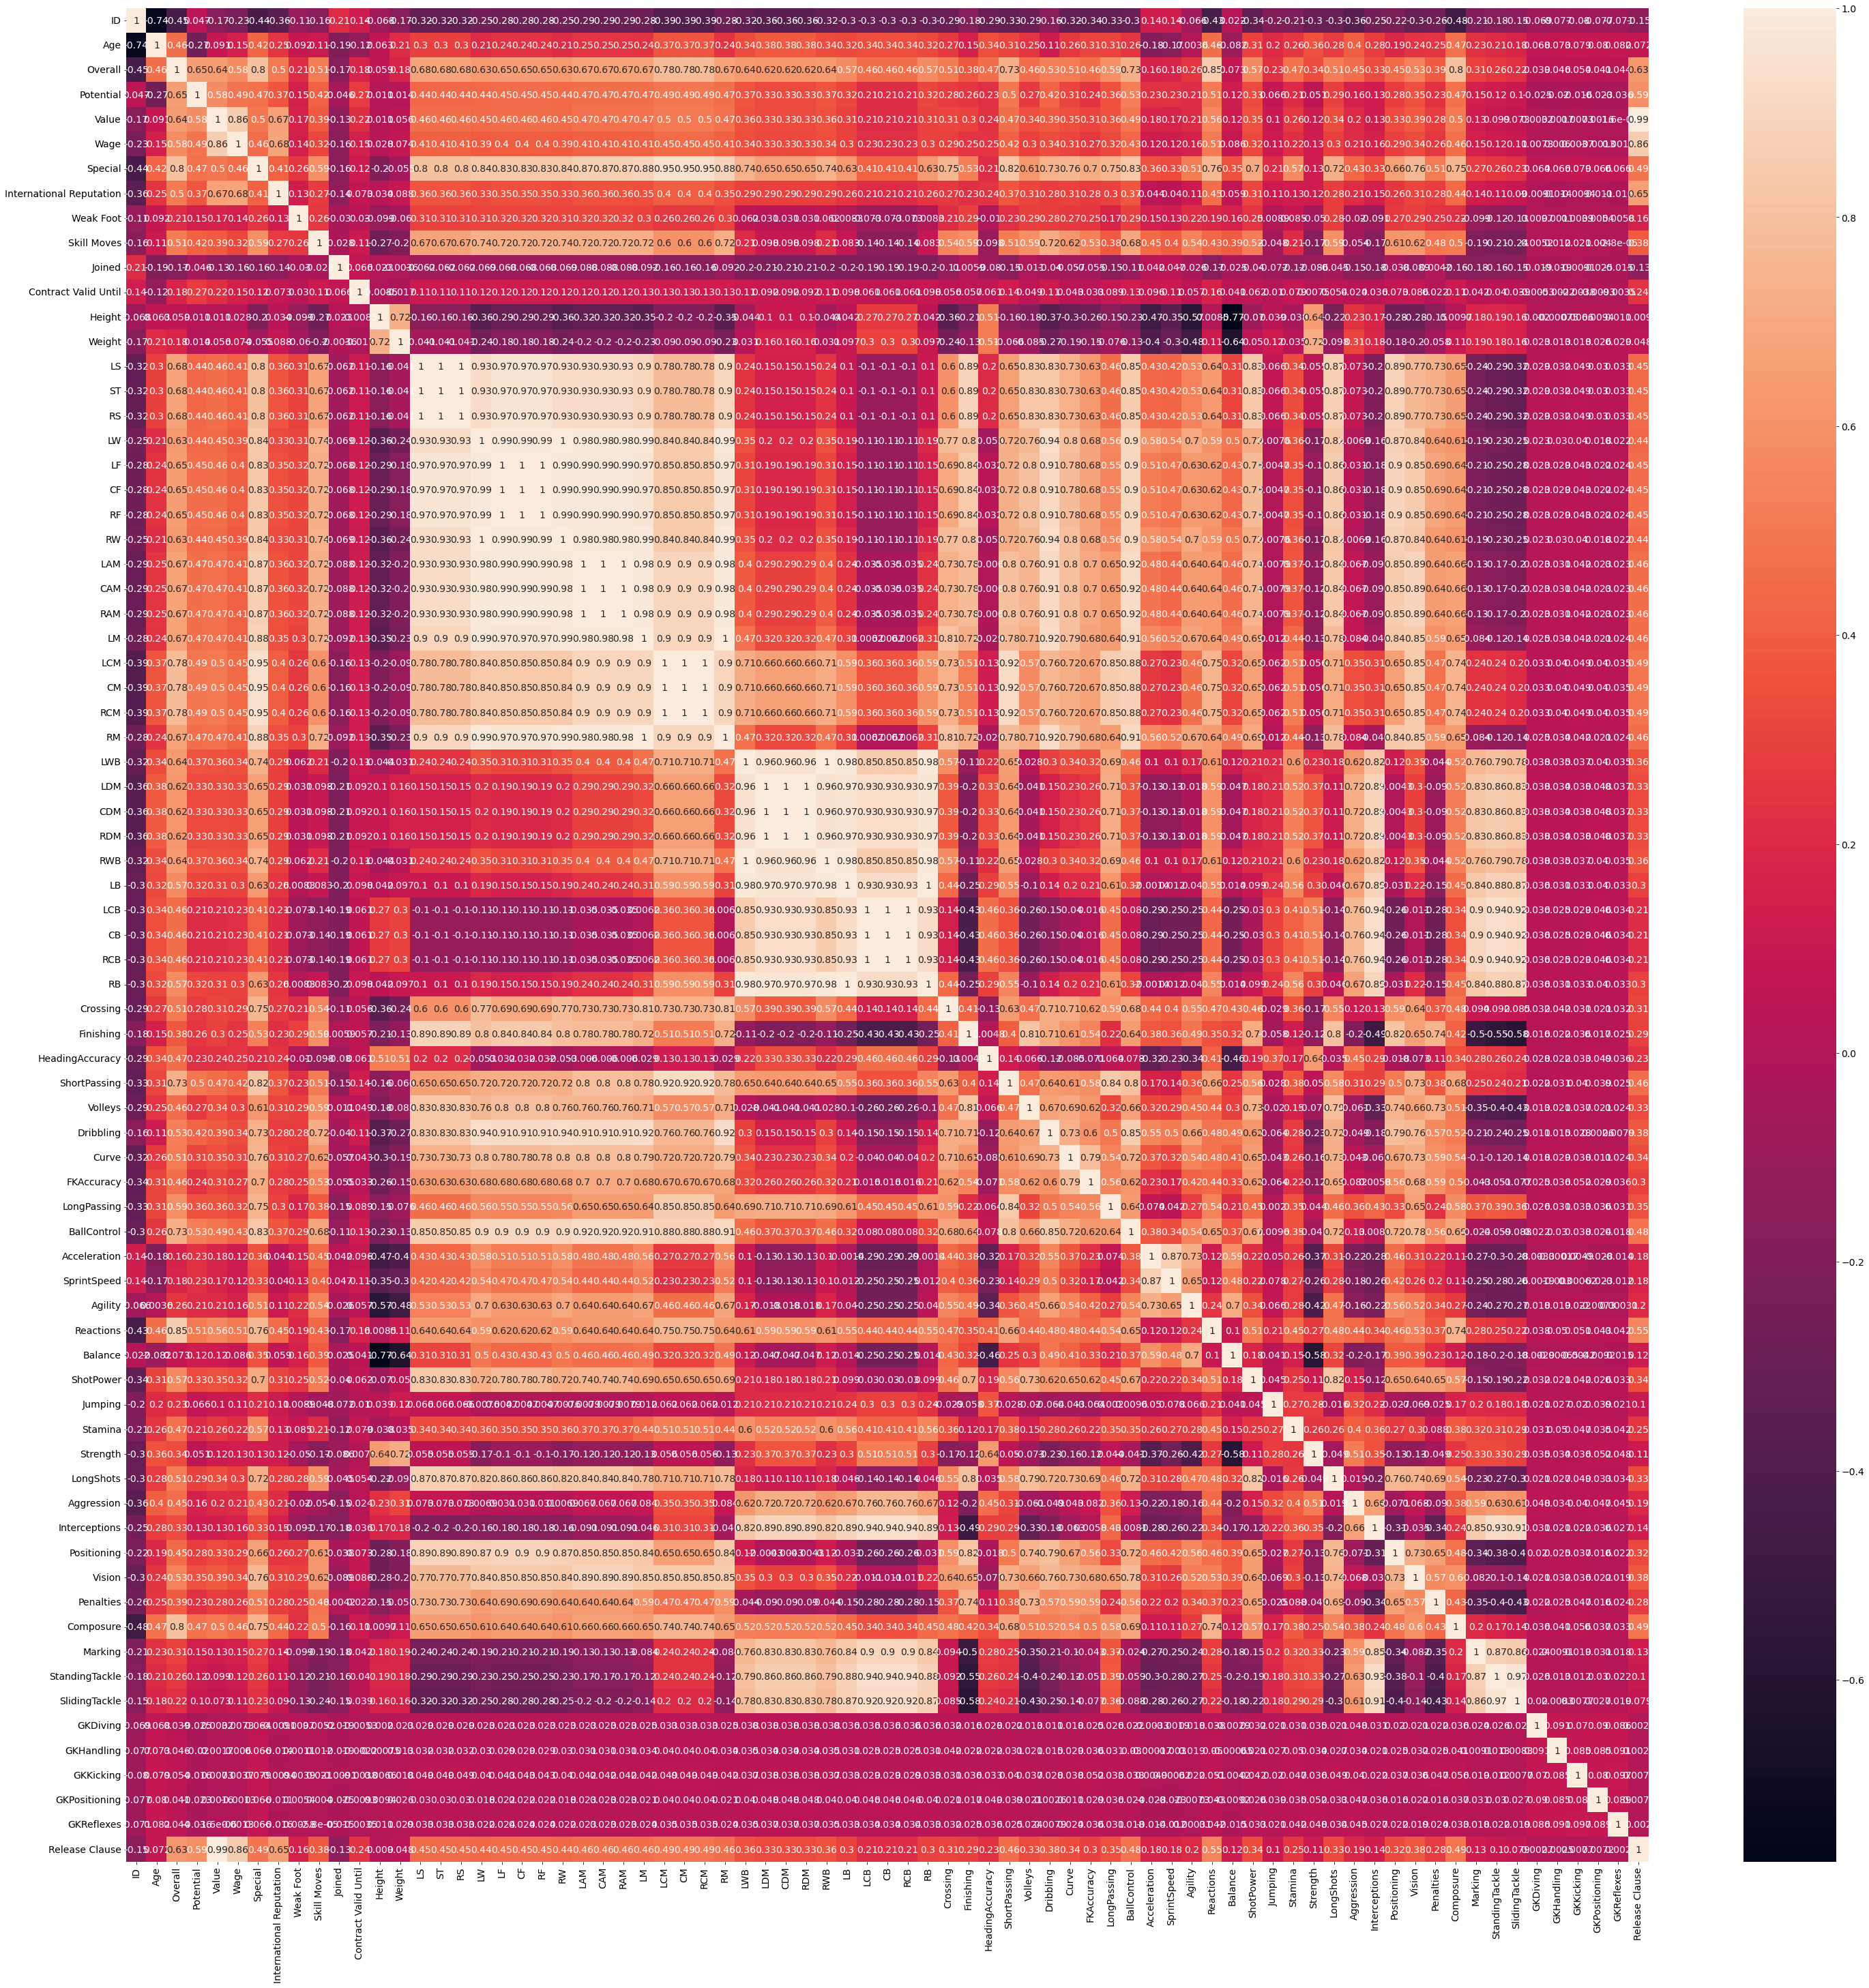

In [ ]:
plt.figure(figsize = (50,50))
ak.heatmap(data_non_gk.corr(), annot=True)

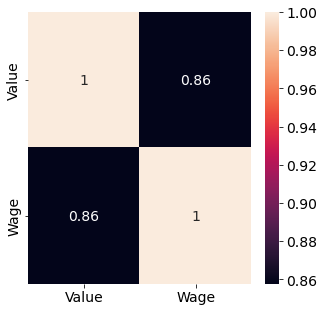

In [ ]:
plt.figure(figsize = (5,5))
ak.heatmap(data_gk[['Value','Wage']].corr(), annot=True)

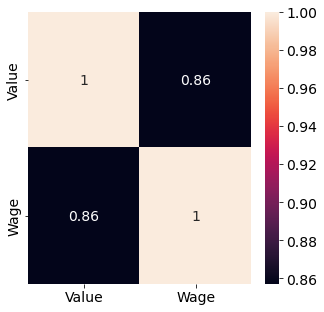

In [ ]:
plt.figure(figsize = (5,5))
ak.heatmap(data_non_gk[['Value','Wage']].corr(), annot=True)

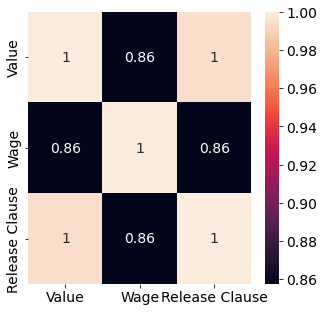

In [ ]:
plt.figure(figsize = (5,5))
ak.heatmap(data_gk[['Value','Wage','Release Clause']].corr(), annot=True)

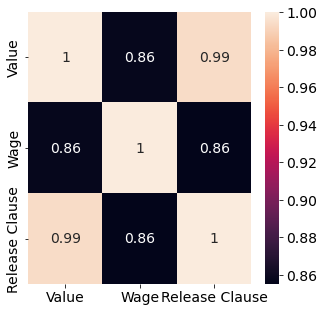

In [ ]:
plt.figure(figsize = (5,5))
ak.heatmap(data_non_gk[['Value','Wage','Release Clause']].corr(), annot=True)

In [ ]:
data_gk.drop(['Value'], inplace=True, axis=1)
data_non_gk.drop(['Value'], inplace=True, axis=1)

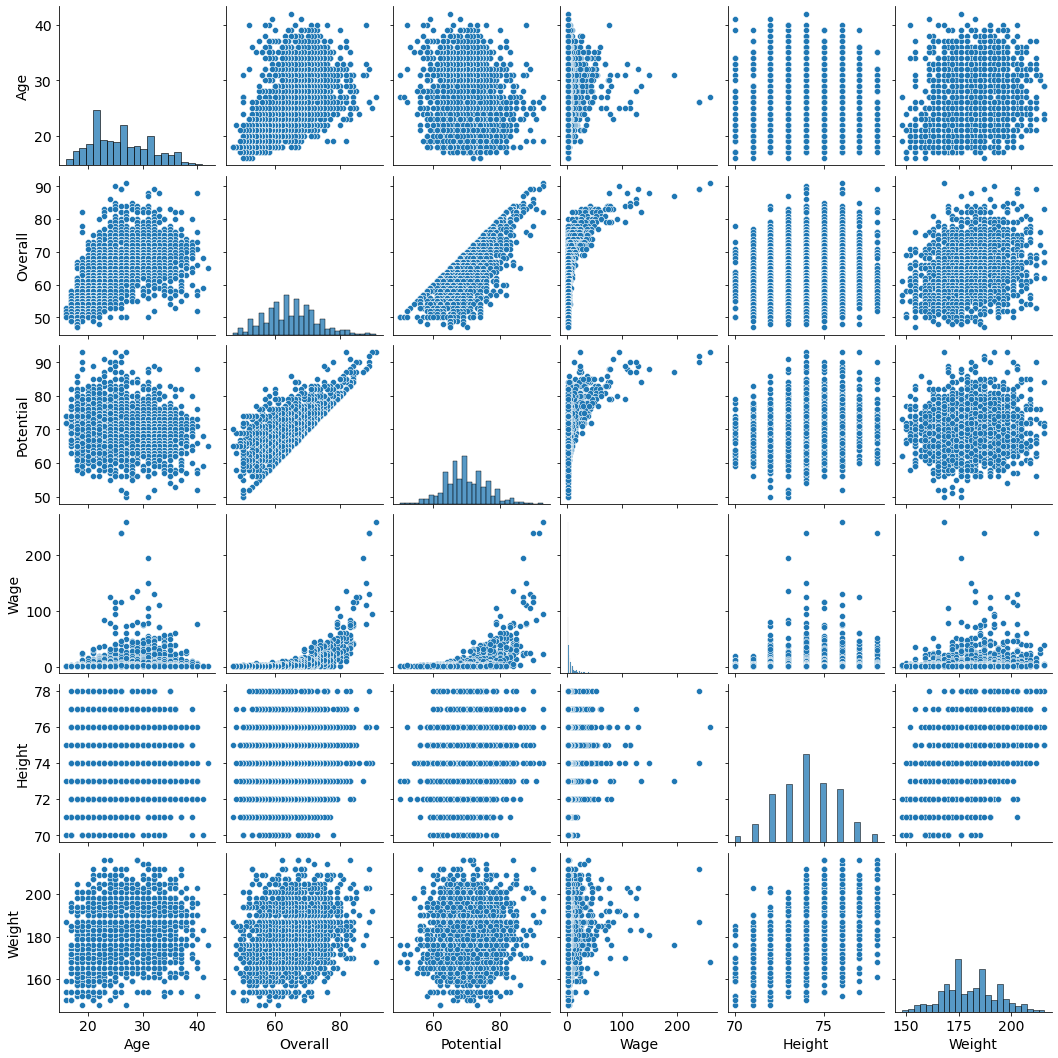

In [ ]:
pairs = data_gk[['Age','Overall','Potential','Wage','Height','Weight']]
ak.pairplot(pairs)

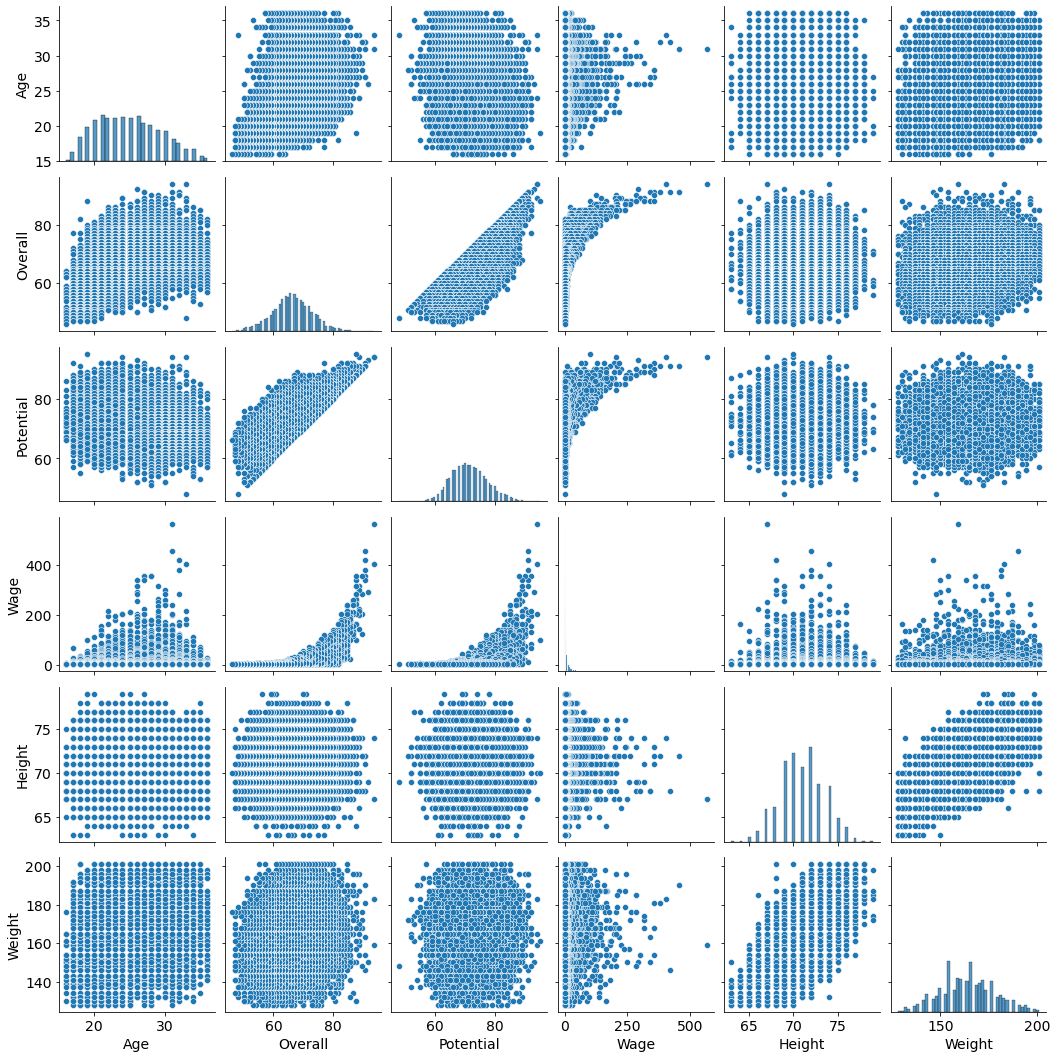

In [ ]:
pairs = data_non_gk[['Age','Overall','Potential','Wage','Height','Weight']]
ak.pairplot(pairs)

Observations: Weak autocorrelation observed between Overall rating and Potential.

In [ ]:
data_gk.drop(['Overall'], inplace=True, axis=1)
data_non_gk.drop(['Overall'], inplace=True, axis=1)

In [ ]:
data_gk.shape

(1941, 53)

In [ ]:
data_non_gk.shape

(15628, 79)

# Model Selection and Evaluation

In [99]:
data_non_gk.head()

ID  Age Nationality  Potential                 Club   Wage  Special  \
0  158023   31   Argentina         94         FC Barcelona  565.0     2202   
1   20801   33    Portugal         94             Juventus  405.0     2228   
2  190871   26      Brazil         93  Paris Saint-Germain  290.0     2143   
4  192985   27     Belgium         92      Manchester City  355.0     2281   
5  183277   27     Belgium         91              Chelsea  340.0     2142   

  Preferred Foot  International Reputation  Weak Foot  Skill Moves  \
0           Left                       5.0        4.0          4.0   
1          Right                       5.0        4.0          5.0   
2          Right                       5.0        5.0          5.0   
4          Right                       4.0        5.0          4.0   
5          Right                       4.0        4.0          4.0   

        Work Rate Body Type Position  Joined  Contract Valid Until  Height  \
0  Medium/ Medium    Normal       RF  2004.0                2021.0    67.0   
1       High/ Low    Normal       ST  2018.0                2022.0    74.0   
2    High/ Medium    Normal       LW  2017.0                2022.0    69.0   
4      High/ High    Normal      RCM  2015.0                2023.0    71.0   
5    High/ Medium    Normal       LF  2012.0                2020.0    68.0   

   Weight    LS    ST    RS    LW    LF    CF    RF    RW   LAM   CAM   RAM  \
0   159.0  88.0  88.0  88.0  92.0  93.0  93.0  93.0  92.0  93.0  93.0  93.0   
1   183.0  91.0  91.0  91.0  89.0  90.0  90.0  90.0  89.0  88.0  88.0  88.0   
2   150.0  84.0  84.0  84.0  89.0  89.0  89.0  89.0  89.0  89.0  89.0  89.0   
4   154.0  82.0  82.0  82.0  87.0  87.0  87.0  87.0  87.0  88.0  88.0  88.0   
5   163.0  83.0  83.0  83.0  89.0  88.0  88.0  88.0  89.0  89.0  89.0  89.0   

     LM   LCM    CM   RCM    RM   LWB   LDM   CDM   RDM   RWB    LB   LCB  \
0  91.0  84.0  84.0  84.0  91.0  64.0  61.0  61.0  61.0  64.0  59.0  47.0   
1  88.0  81.0  81.0  81.0  88.0  65.0  61.0  61.0  61.0  65.0  61.0  53.0   
2  88.0  81.0  81.0  81.0  88.0  65.0  60.0  60.0  60.0  65.0  60.0  47.0   
4  88.0  87.0  87.0  87.0  88.0  77.0  77.0  77.0  77.0  77.0  73.0  66.0   
5  89.0  82.0  82.0  82.0  89.0  66.0  63.0  63.0  63.0  66.0  60.0  49.0   

     CB   RCB    RB  Crossing  Finishing  HeadingAccuracy  ShortPassing  \
0  47.0  47.0  59.0      84.0       95.0             70.0          90.0   
1  53.0  53.0  61.0      84.0       94.0             89.0          81.0   
2  47.0  47.0  60.0      79.0       87.0             62.0          84.0   
4  66.0  66.0  73.0      93.0       82.0             55.0          92.0   
5  49.0  49.0  60.0      81.0       84.0             61.0          89.0   

   Volleys  Dribbling  Curve  FKAccuracy  LongPassing  BallControl  \
0     86.0       97.0   93.0        94.0         87.0         96.0   
1     87.0       88.0   81.0        76.0         77.0         94.0   
2     84.0       96.0   88.0        87.0         78.0         95.0   
4     82.0       86.0   85.0        83.0         91.0         91.0   
5     80.0       95.0   83.0        79.0         83.0         94.0   

   Acceleration  SprintSpeed  Agility  Reactions  Balance  ShotPower  Jumping  \
0          91.0         86.0     91.0       95.0     95.0       85.0     68.0   
1          89.0         91.0     87.0       96.0     70.0       95.0     95.0   
2          94.0         90.0     96.0       94.0     84.0       80.0     61.0   
4          78.0         76.0     79.0       91.0     77.0       91.0     63.0   
5          94.0         88.0     95.0       90.0     94.0       82.0     56.0   

   Stamina  Strength  LongShots  Aggression  Interceptions  Positioning  \
0     72.0      59.0       94.0        48.0           22.0         94.0   
1     88.0      79.0       93.0        63.0           29.0         95.0   
2     81.0      49.0       82.0        56.0           36.0         89.0   
4     90.0      75.0       91.0        76.0        

Observation: There are way too many parameters in our dataset. We can handle those smartly with the help of some domain knowledge.

For example: There are three main lines for the line-ups of players:



1. Forward: Strikers, Wingers ('LS', 'ST', 'RS','LW', 'LF', 'CF', 'RF', 'RW')
2. Mid: Midfielders ('LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM','RCM', 'RM')
3. Back: Defense ('LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB','RCB', 'RB')

Similarly, we can combine some more columns as follows:

1. General Stats ('Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle')
2. Goalkeeping Stats ('GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes')

We can surely take the average of the respective columns to significantly reduce the number of features / dimensions.





In [100]:
params_Forward = ['LS', 'ST', 'RS','LW', 'LF', 'CF', 'RF', 'RW']
params_Mid = ['LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM','RCM', 'RM']
params_Back = ['LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB','RCB', 'RB']
params_general = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']
params_GK = ['GKDiving','GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

In [101]:
data_non_gk['Forward'] = data_non_gk[params_Forward].mean(axis=1)
data_non_gk['Mid'] = data_non_gk[params_Mid].mean(axis=1)
data_non_gk['Back'] = data_non_gk[params_Back].mean(axis=1)
data_non_gk['General'] = data_non_gk[params_general].mean(axis=1)
data_non_gk['GK'] = data_non_gk[params_GK].mean(axis=1)
data_non_gk.drop(params_Forward+params_Mid+params_Back+params_general+params_GK, inplace=True,axis=1)
data_non_gk.head()

ID  Age Nationality  Potential                 Club   Wage  Special  \
0  158023   31   Argentina         94         FC Barcelona  565.0     2202   
1   20801   33    Portugal         94             Juventus  405.0     2228   
2  190871   26      Brazil         93  Paris Saint-Germain  290.0     2143   
4  192985   27     Belgium         92      Manchester City  355.0     2281   
5  183277   27     Belgium         91              Chelsea  340.0     2142   

  Preferred Foot  International Reputation  Weak Foot  Skill Moves  \
0           Left                       5.0        4.0          4.0   
1          Right                       5.0        4.0          5.0   
2          Right                       5.0        5.0          5.0   
4          Right                       4.0        5.0          4.0   
5          Right                       4.0        4.0          4.0   

        Work Rate Body Type Position  Joined  Contract Valid Until  Height  \
0  Medium/ Medium    Normal       RF  2004.0                2021.0    67.0   
1       High/ Low    Normal       ST  2018.0                2022.0    74.0   
2    High/ Medium    Normal       LW  2017.0                2022.0    69.0   
4      High/ High    Normal      RCM  2015.0                2023.0    71.0   
5    High/ Medium    Normal       LF  2012.0                2020.0    68.0   

   Weight  Release Clause  Forward     Mid  Back    General    GK  
0   159.0        226500.0   90.875  89.125  57.0  77.379310  10.8  
1   183.0        127100.0   90.125  85.375  59.4  78.103448  11.6  
2   150.0        228100.0   87.125  85.750  57.1  75.103448  11.8  
4   154.0        196400.0   85.125  87.625  72.9  79.758621  11.2  
5   163.0        172100.0   86.375  86.375  58.8  75.448276   9.0

Note: For Goalkeepers, we only need to handle the data for general and Goalkeeper stats.

In [105]:
data_gk['General'] = data_gk[params_general].mean(axis=1)
data_gk['GK'] = data_gk[params_GK].mean(axis=1)
data_gk.drop(params_general+params_GK, inplace=True,axis=1)
data_gk.head()

ID  Age Nationality  Potential               Club   Wage  Special  \
3   193080   27       Spain         93  Manchester United  260.0     1471   
9   200389   25    Slovenia         93    Atlético Madrid   94.0     1331   
18  192448   26     Germany         92       FC Barcelona  240.0     1328   
19  192119   26     Belgium         90        Real Madrid  240.0     1311   
22  167495   32     Germany         89  FC Bayern München  130.0     1473   

   Preferred Foot  International Reputation  Weak Foot  Skill Moves  \
3           Right                       4.0        3.0          1.0   
9           Right                       3.0        3.0          1.0   
18          Right                       3.0        4.0          1.0   
19           Left                       4.0        2.0          1.0   
22          Right                       5.0        4.0          1.0   

         Work Rate Body Type Position  Joined  Contract Valid Until  Height  \
3   Medium/ Medium      Lean       GK  2011.0                2020.0    76.0   
9   Medium/ Medium    Normal       GK  2014.0                2021.0    74.0   
18  Medium/ Medium    Normal       GK  2014.0                2022.0    74.0   
19  Medium/ Medium    Normal       GK  2018.0                2024.0    78.0   
22  Medium/ Medium    Normal       GK  2011.0                2021.0    76.0   

    Weight  Release Clause    General    GK  
3    168.0        138600.0  37.758621  88.8  
9    192.0        144500.0  33.379310  86.6  
18   187.0        123300.0  33.172414  87.0  
19   212.0        113700.0  32.931034  84.4  
22   203.0         62700.0  38.000000  88.2

In [106]:
test_gk = data_gk[data_gk['Release Clause'].isna()]
test_gk.shape

(87, 21)

In [107]:
train_gk = data_gk[data_gk['Release Clause'].notna()]
train_gk.shape

(1854, 21)

## Study of Linear Models for the dataset

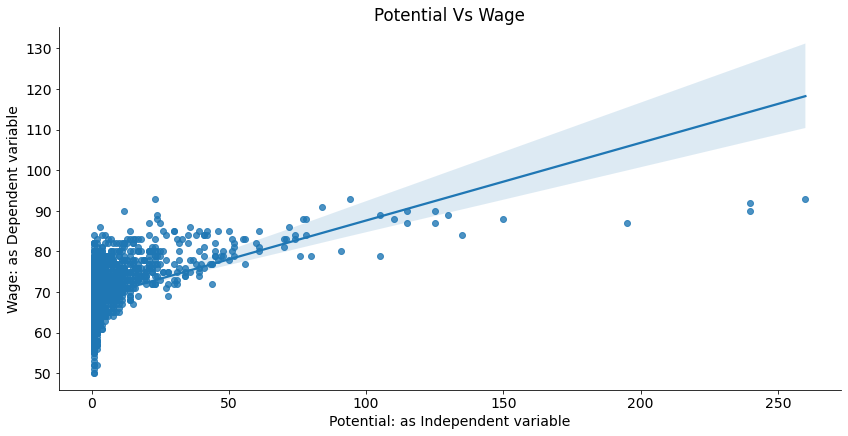

In [267]:
ak.lmplot(x='Wage',y='Potential',data=data_gk,aspect=2,height=6)
plt.xlabel('Potential: as Independent variable')
plt.ylabel('Wage: as Dependent variable')
plt.title('Potential Vs Wage');

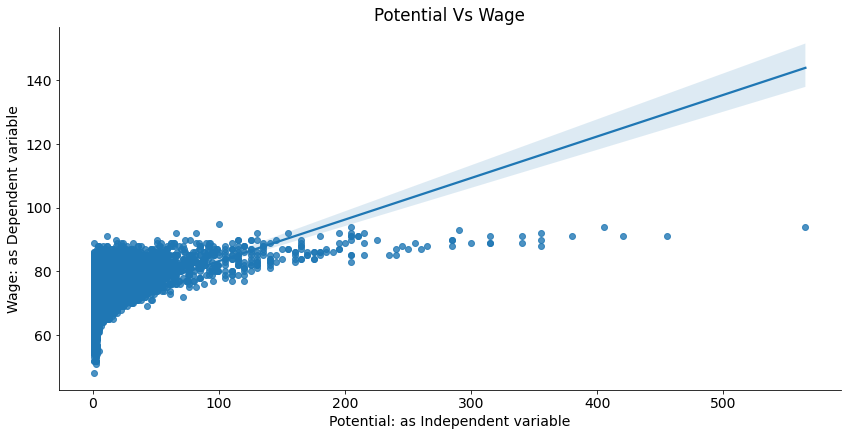

In [268]:
ak.lmplot(x='Wage',y='Potential',data=data_non_gk,aspect=2,height=6)
plt.xlabel('Potential: as Independent variable')
plt.ylabel('Wage: as Dependent variable')
plt.title('Potential Vs Wage');

In [112]:
data_non_gk.columns

Index(['ID', 'Age', 'Nationality', 'Potential', 'Club', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Joined',
       'Contract Valid Until', 'Height', 'Weight', 'Release Clause', 'Forward',
       'Mid', 'Back', 'General', 'GK'],
      dtype='object')

In [269]:
numeric_cols = ['Wage','Potential', 'Forward','Mid', 'Back', 'General', 'GK','Release Clause']
data_non_gk_model1 = data_non_gk[numeric_cols]

In [270]:
for i in numeric_cols:
  if i != 'Release Clause':
    data_non_gk_model1[i] = (data_non_gk_model1[i]-data_non_gk_model1[i].min())/(data_non_gk_model1[i].max()-data_non_gk_model1[i].min())
data_non_gk_model1.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Wage  Potential   Forward      Mid      Back   General        GK  \
0  1.000000   0.978723  1.000000  1.00000  0.504456  0.936709  0.298780   
1  0.716312   0.978723  0.988072  0.93750  0.547237  0.952345  0.323171   
2  0.512411   0.957447  0.940358  0.94375  0.506239  0.887565  0.329268   

   Release Clause  
0        226500.0  
1        127100.0  
2        228100.0

In [271]:
dict(data_non_gk_model1.isna().sum())

{'Wage': 0,
 'Potential': 0,
 'Forward': 0,
 'Mid': 0,
 'Back': 0,
 'General': 0,
 'GK': 0,
 'Release Clause': 1159}

In [272]:
train_non_gk = data_non_gk_model1[data_non_gk_model1['Release Clause'].notna()]
train_non_gk.shape

(14469, 8)

In [ ]:
Y_train = train_non_gk['Release Clause']
train_non_gk.drop('Release Clause',inplace=True,axis=1)

In [274]:
X_train, X_test, y_train, y_test = train_test_split(train_non_gk,Y_train ,random_state=0, test_size=0.25, shuffle=True)

In [275]:
lm_model1 = LinearRegression()
lm_model1.fit(X_train,y_train)

LinearRegression()

In [135]:
print("R-Squared Value of Model 1: ",lm_model1.score(X_train,y_train))

R-Squared Value of Model 1:  0.7770779971251256


Note: the R-squared value explaines how well our model can understand based on the data provided i.e. how well it can fit our data. The goal is to make it closer to 1. So, based on the data, the model has a decent R-squared value.

In [276]:
print('Intercept: ', lm_model1.intercept_)
print('Coefficients: ', lm_model1.coef_)

Intercept:  -9911.144510345428
Coefficients:  [202608.04729993  17025.28212245   4237.22150084   4045.93940376
    715.23966018  -3125.80896106    699.35756765]


In [277]:
pred_lm_model1 = lm_model1.predict(X_test)
pred_lm_model1[0:2]

array([6037.15731378,  462.17047363])

In [282]:
X_test.head(2)

Wage  Potential   Forward       Mid      Back   General        GK
6378   0.014184   0.553191  0.612326  0.556250  0.238859  0.501862  0.298780
16902  0.000000   0.446809  0.409543  0.441667  0.338681  0.391660  0.323171

In [278]:
print(metrics.mean_absolute_error(y_test,pred_lm_model1))

2738.570957962668


In [281]:
print('MSE: ',metrics.mean_squared_error(y_test,pred_lm_model1))
print('RMSE: ',metrics.mean_squared_error(y_test,pred_lm_model1)**0.5)

MSE:  28878898.52604343
RMSE:  5373.90905450059


In [283]:
numeric_cols = ['Wage','Potential', 'General', 'GK','Release Clause']
data_gk_model1 = data_gk[numeric_cols]
train_gk = data_gk_model1[data_gk_model1['Release Clause'].notna()]
train_gk.shape

(1854, 5)

In [284]:
Y_train = train_gk['Release Clause']
train_gk.drop('Release Clause',inplace=True,axis=1)
X_train, X_test, y_train, y_test = train_test_split(train_gk,Y_train ,random_state=0, test_size=0.25, shuffle=True)
lm_model2 = LinearRegression()
lm_model2.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


LinearRegression()

In [285]:
print("R-Squared Value of Model 1: ",lm_model2.score(X_train,y_train))

R-Squared Value of Model 1:  0.7927142826731048


In [286]:
print('Intercept: ', lm_model2.intercept_)
print('Coefficients: ', lm_model2.coef_)

Intercept:  -16053.084362092588
Coefficients:  [396.79381473 236.93783013 -24.06045885   7.42553289]


In [287]:
pred_lm_model2 = lm_model2.predict(X_test)
print(pred_lm_model2[0:2])
X_test.head(2)

[1075.68881953 4413.84805958]


Wage  Potential    General    GK
8895   2.0         70  30.655172  65.6
7806   4.0         80  23.620690  66.4

In [288]:
print('MSE: ',metrics.mean_squared_error(y_test,pred_lm_model2))
print('RMSE: ',metrics.mean_squared_error(y_test,pred_lm_model2)**0.5)

MSE:  37447628.22180014
RMSE:  6119.446725137833


## Study of Decision Tree Model for the dataset

In [154]:
dt_model1 = DecisionTreeRegressor(max_depth=3,random_state=0).fit(X_train,y_train)

In [155]:
pred_dt_model1 = dt_model1.predict(X_test)

In [156]:
pred_dt_model1[0]

611.2678571428571

In [157]:
dt_graph_data = export_graphviz(dt_model1, feature_names=['Wage','Potential', 'General', 'GK'],  filled=True, rounded=True)  
dt_graph = graphviz.Source(dt_graph_data)
dt_graph.render("Decision Tree") 

'Decision Tree.pdf'

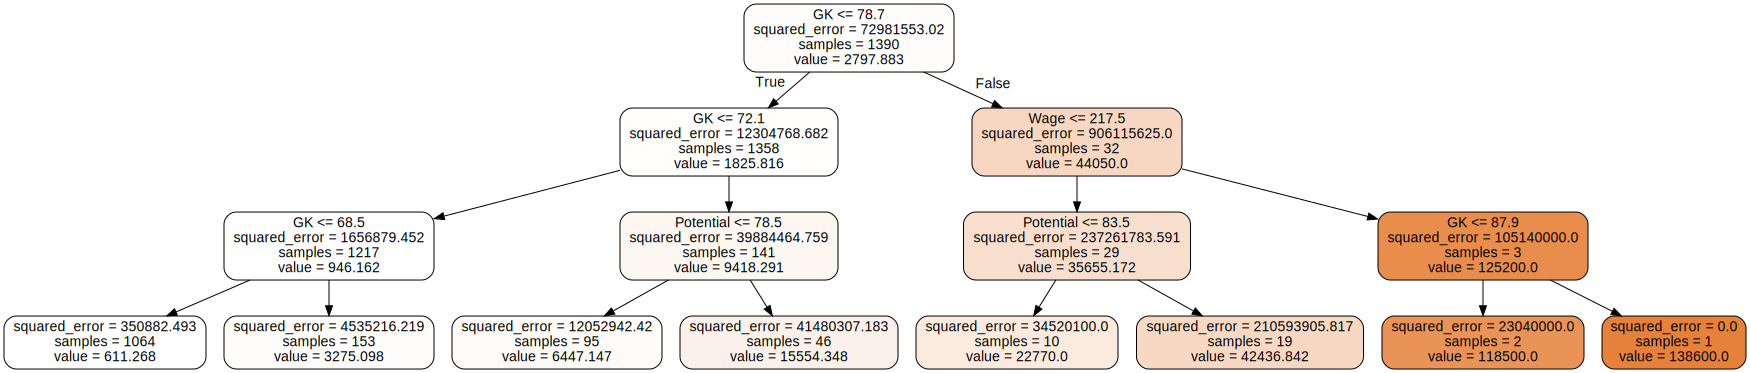

In [158]:
dt_graph

Observation: We selected the max depth of the Tree to be 3. Decision Trees break the given data into smaller subsets and associates the rules while developing the model incrementally.

In [164]:
dt_mse = metrics.mean_squared_error(y_test, pred_dt_model1)
dt_rmse = dt_mse**.5
print('MSE value of Decision Tree model: ',dt_mse)
print('RMSE value of Decision Tree model: ',dt_rmse)

MSE value of Decision Tree model:  33186227.923708424
MSE value of Decision Tree model:  5760.748903025406


## Study of Random Forest Model for the dataset

In [290]:
rf_model1 = RandomForestRegressor(n_estimators = 50,max_depth=5, random_state = 0)
rf_model1.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=50, random_state=0)

In [291]:
pred_rf_model1 = rf_model1.predict(X_test)

In [293]:
rf_mse = metrics.mean_squared_error(y_test, pred_rf_model1)
rf_rmse = rf_mse**.5
print('MSE value of Random Forest model: ',rf_mse)
print('RMSE value of Random Forest model: ',rf_rmse)

MSE value of Random Forest model:  13835101.433641877
RMSE value of Random Forest model:  3719.5566178836257


Observtaion: There is a significant drop in the MSE and RMSE values in the Random Forest Regressor model as compared to the Decision Tree Model. This is because Random Forest works by developing a framework of multiple Decision Trees and considers the average of the results of each tree thereby improving the model.

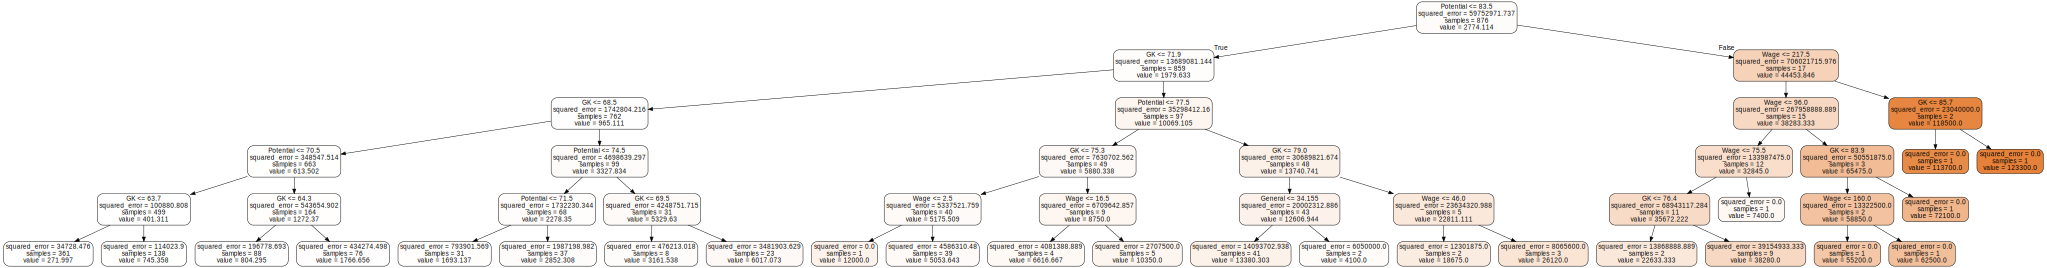

In [169]:
rf_graph_data = export_graphviz(rf_model1.estimators_[10], feature_names=['Wage','Potential', 'General', 'GK'],  filled=True, rounded=True)  
rf_graph = graphviz.Source(rf_graph_data)
rf_graph

In [289]:
rf_graph.render("Random Forest") 

'Random Forest.pdf'

## K-Nearest Neighbors Model

In [178]:
kmeans_data_ngk = data_non_gk.copy()
kmeans_data_ngk.head()

ID  Age Nationality  Potential                 Club   Wage  Special  \
0  158023   31   Argentina         94         FC Barcelona  565.0     2202   
1   20801   33    Portugal         94             Juventus  405.0     2228   
2  190871   26      Brazil         93  Paris Saint-Germain  290.0     2143   
4  192985   27     Belgium         92      Manchester City  355.0     2281   
5  183277   27     Belgium         91              Chelsea  340.0     2142   

  Preferred Foot  International Reputation  Weak Foot  Skill Moves  \
0           Left                       5.0        4.0          4.0   
1          Right                       5.0        4.0          5.0   
2          Right                       5.0        5.0          5.0   
4          Right                       4.0        5.0          4.0   
5          Right                       4.0        4.0          4.0   

        Work Rate Body Type Position  Joined  Contract Valid Until  Height  \
0  Medium/ Medium    Normal       RF  2004.0                2021.0    67.0   
1       High/ Low    Normal       ST  2018.0                2022.0    74.0   
2    High/ Medium    Normal       LW  2017.0                2022.0    69.0   
4      High/ High    Normal      RCM  2015.0                2023.0    71.0   
5    High/ Medium    Normal       LF  2012.0                2020.0    68.0   

   Weight  Release Clause  Forward     Mid  Back    General    GK  
0   159.0        226500.0   90.875  89.125  57.0  77.379310  10.8  
1   183.0        127100.0   90.125  85.375  59.4  78.103448  11.6  
2   150.0        228100.0   87.125  85.750  57.1  75.103448  11.8  
4   154.0        196400.0   85.125  87.625  72.9  79.758621  11.2  
5   163.0        172100.0   86.375  86.375  58.8  75.448276   9.0

In [180]:
columns = kmeans_data_ngk['Position'].values
columns

array(['RF', 'ST', 'LW', ..., 'ST', 'RW', 'CM'], dtype=object)

In [181]:
knn_features = ['Potential','Wage','Forward','Mid','Back','General']

In [182]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(kmeans_data_ngk[knn_features],kmeans_data_ngk['Position'] ,random_state=104, test_size=0.25, shuffle=True)

In [183]:
knn_model1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_model1.fit(X_train2, y_train2)

KNeighborsClassifier()

In [185]:
pred_knn_model1 = knn_model1.predict(X_test2)

In [187]:
print("The Accuracy of our model is: ", metrics.accuracy_score(y_test2, pred_knn_model1)*100)

The Accuracy of our model is:  33.24801638085488


In [193]:
for i in range(3,30):
  knn_model2 = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski')
  knn_model2.fit(X_train2, y_train2)
  pred_knn_model2 = knn_model2.predict(X_test2)
  print("The Accuracy of our model considering ", i," neighbors is: ", metrics.accuracy_score(y_test2, pred_knn_model2)*100)

The Accuracy of our model considering  3  neighbors is:  30.458152034809316
The Accuracy of our model considering  4  neighbors is:  31.507550550294344
The Accuracy of our model considering  5  neighbors is:  33.24801638085488
The Accuracy of our model considering  6  neighbors is:  33.37599180957256
The Accuracy of our model considering  7  neighbors is:  34.015868953161
The Accuracy of our model considering  8  neighbors is:  34.758126439723576
The Accuracy of our model considering  9  neighbors is:  35.06526746864602
The Accuracy of our model considering  10  neighbors is:  35.21883798310724
The Accuracy of our model considering  11  neighbors is:  35.474788840542615
The Accuracy of our model considering  12  neighbors is:  35.52597901202969
The Accuracy of our model considering  13  neighbors is:  35.52597901202969
The Accuracy of our model considering  14  neighbors is:  36.03788072690043
The Accuracy of our model considering  15  neighbors is:  35.90990529818275
The Accuracy of o

In [191]:
knn_features2 = ['Forward','Mid','Back','General']
X_train3, X_test3, y_train3, y_test3 = train_test_split(kmeans_data_ngk[knn_features2],kmeans_data_ngk['Position'] ,random_state=104, test_size=0.25, shuffle=True)

In [198]:
for i in range(3, 31):
  knn_model3 = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski')
  knn_model3.fit(X_train3, y_train3)
  pred_knn_model3 = knn_model3.predict(X_test3)
  print("The Accuracy of our model considering ", i," neighbors is: ", metrics.accuracy_score(y_test3, pred_knn_model3)*100)

The Accuracy of our model considering  3  neighbors is:  32.0962375223957
The Accuracy of our model considering  4  neighbors is:  33.606347581264394
The Accuracy of our model considering  5  neighbors is:  34.22062963910929
The Accuracy of our model considering  6  neighbors is:  35.24443306885078
The Accuracy of our model considering  7  neighbors is:  35.398003583312004
The Accuracy of our model considering  8  neighbors is:  35.32121832608139
The Accuracy of our model considering  9  neighbors is:  35.98669055541336
The Accuracy of our model considering  10  neighbors is:  36.6265676990018
The Accuracy of our model considering  11  neighbors is:  37.36882518556437
The Accuracy of our model considering  12  neighbors is:  37.57358587151267
The Accuracy of our model considering  13  neighbors is:  37.240849756846686
The Accuracy of our model considering  14  neighbors is:  37.65037112874328
The Accuracy of our model considering  15  neighbors is:  37.47120552853852
The Accuracy of ou

Observation: For this particular dataset, the K-nn algorithm does not work best to indetify different positions of the players based on the given dataset.
<br>
However, we can check if we can perform binary classification on the given datset.

## Models for Binary Classification:

In [215]:
bin_features = ['Potential','Wage','General','GK','Position']
d1 = data_gk[bin_features].copy()
d2 = data_non_gk[bin_features].copy()
bin_data = d1.append(d2)

In [216]:
bin_data['Class'] = np.where(bin_data['Position']=='GK', 1, 0)
bin_data.drop('Position',inplace=True,axis=1)
bin_data.head()

Potential   Wage    General    GK  Class
3          93  260.0  37.758621  88.8      1
9          93   94.0  33.379310  86.6      1
18         92  240.0  33.172414  87.0      1
19         90  240.0  32.931034  84.4      1
22         89  130.0  38.000000  88.2      1

In [217]:
bin_data = bin_data.sample(frac=1)
bin_data.head()

Potential  Wage    General    GK  Class
2365          77  23.0  30.965517  73.2      1
2471          76  43.0  65.517241  12.2      0
7134          70   4.0  54.896552  12.2      0
18003         72   1.0  19.275862  51.6      1
6297          74   9.0  49.724138   8.8      0

In [218]:
y_bin_data = bin_data['Class']
bin_data.drop(['Class','GK','General'], inplace=True,axis=1)

In [219]:
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(bin_data,y_bin_data ,random_state=104, test_size=0.25, shuffle=True)

In [220]:
log_model1 = LogisticRegression(solver='liblinear', random_state=0)
log_model1.fit(X_train_bin, y_train_bin)
logClass_pred = log_model1.predict(X_test_bin)
print(metrics.confusion_matrix(y_test_bin, logClass_pred))

[[3916    0]
 [ 477    0]]


In [221]:
print(metrics.classification_report(y_test_bin, logClass_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3916
           1       0.00      0.00      0.00       477

    accuracy                           0.89      4393
   macro avg       0.45      0.50      0.47      4393
weighted avg       0.79      0.89      0.84      4393



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


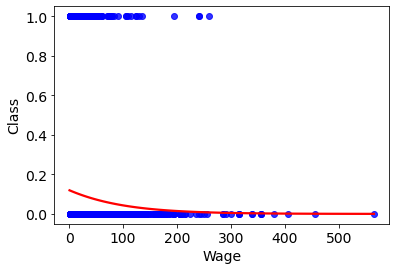

In [257]:
ak.regplot(x=X_train_bin['Wage'], y=y_train_bin, data=X_train_bin, logistic=True, ci=None,scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

Observation: For the selected number of features, the Logistic Regression model fails to draw a decision bourdary that best classifies the players as Goalkeepers and Non-Goalkeepers.

<br>

Let us incorporate the General statistics fiels first and check if the model can classify using general stats.

In [243]:
bin_features = ['Age','Special','Potential','Wage','General','GK','Position']
d1 = data_gk[bin_features].copy()
d2 = data_non_gk[bin_features].copy()
bin_data = d1.append(d2)
bin_data['Class'] = np.where(bin_data['Position']=='GK', 1, 0)
y_bin_data = bin_data['Class']
bin_data.drop('Position',inplace=True,axis=1)
bin_data.head()
bin_data.drop(['Class','GK'], inplace=True,axis=1)

In [244]:
X_train_bin2, X_test_bin2, y_train_bin2, y_test_bin2 = train_test_split(bin_data,y_bin_data ,random_state=104, test_size=0.25, shuffle=True)

In [245]:
log_model2 = LogisticRegression(solver='liblinear', random_state=0)
log_model2.fit(X_train_bin2, y_train_bin2)
logClass_pred2 = log_model2.predict(X_test_bin2)
print(metrics.confusion_matrix(y_test_bin2, logClass_pred2))

[[3896    1]
 [   0  496]]


In [247]:
print(metrics.classification_report(y_test_bin2, logClass_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3897
           1       1.00      1.00      1.00       496

    accuracy                           1.00      4393
   macro avg       1.00      1.00      1.00      4393
weighted avg       1.00      1.00      1.00      4393



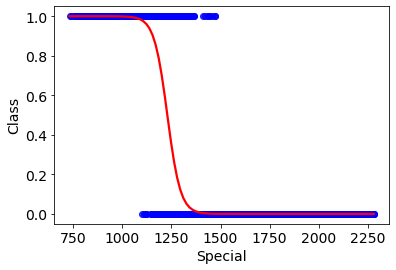

In [258]:
ak.regplot(x=X_train_bin2['Special'], y=y_train_bin2, data=X_train_bin2, logistic=True, ci=None,scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

Observation: For the given dataset, we are able to classify players using the selected number of features.

In [259]:
bin_features = ['Age','Special','Potential','Wage','General','GK','Position']
d1 = data_gk[bin_features].copy()
d2 = data_non_gk[bin_features].copy()
bin_data = d1.append(d2)
bin_data['Class'] = np.where(bin_data['Position']=='GK', 1, 0)
bin_data[bin_data['Class']==0].head()

Age  Special  Potential   Wage    General    GK Position  Class
0   31     2202         94  565.0  77.379310  10.8       RF      0
1   33     2228         94  405.0  78.103448  11.6       ST      0
2   26     2143         93  290.0  75.103448  11.8       LW      0
4   27     2281         92  355.0  79.758621  11.2      RCM      0
5   27     2142         91  340.0  75.448276   9.0       LF      0

In [260]:
bin_data[bin_data['Class']==1].head()

Age  Special  Potential   Wage    General    GK Position  Class
3    27     1471         93  260.0  37.758621  88.8       GK      1
9    25     1331         93   94.0  33.379310  86.6       GK      1
18   26     1328         92  240.0  33.172414  87.0       GK      1
19   26     1311         90  240.0  32.931034  84.4       GK      1
22   32     1473         89  130.0  38.000000  88.2       GK      1

Observation: We can see that the two datasets appear to have different but consistent values in Special and General columns. Hence, let us conduct t-tests to check if this is statistically significant.

In [265]:
researchpy.ttest(group1= bin_data['Special'][bin_data['Class'] ==0], group1_name= "Non-Goalkeeper",group2= bin_data['Special'][bin_data['Class'] == 1], group2_name= "Goalkeeper")

(         Variable        N         Mean          SD        SE    95% Conf.  \
 0  Non-Goalkeeper  15628.0  1668.344510  196.610917  1.572736  1665.261764   
 1      Goalkeeper   1941.0  1046.935085  131.996887  2.996063  1041.059244   
 2        combined  17569.0  1599.692014  272.505545  2.055899  1595.662248   
 
       Interval  
 0  1671.427255  
 1  1052.810926  
 2  1603.721780  ,                             Independent t-test     results
 0  Difference (Non-Goalkeeper - Goalkeeper) =     621.4094
 1                        Degrees of freedom =   17567.0000
 2                                         t =     135.5032
 3                     Two side test p value =       0.0000
 4                    Difference < 0 p value =       1.0000
 5                    Difference > 0 p value =       0.0000
 6                                 Cohen's d =       3.2611
 7                                 Hedge's g =       3.2609
 8                            Glass's delta1 =       3.1606
 9        

In [266]:
researchpy.ttest(group1= bin_data['General'][bin_data['Class'] ==1], group1_name= "Goalkeeper",group2= bin_data['General'][bin_data['Class'] == 0], group2_name= "Non-Goalkeeper")

(         Variable        N       Mean         SD        SE  95% Conf.  \
 0      Goalkeeper   1941.0  26.663380   3.887409  0.088236  26.490332   
 1  Non-Goalkeeper  15628.0  57.794847   7.010791  0.056081  57.684921   
 2        combined  17569.0  54.355483  11.859095  0.089470  54.180113   
 
     Interval  
 0  26.836428  
 1  57.904772  
 2  54.530853  ,                             Independent t-test     results
 0  Difference (Goalkeeper - Non-Goalkeeper) =     -31.1315
 1                        Degrees of freedom =   17567.0000
 2                                         t =    -191.9997
 3                     Two side test p value =       0.0000
 4                    Difference < 0 p value =       0.0000
 5                    Difference > 0 p value =       1.0000
 6                                 Cohen's d =      -4.6207
 7                                 Hedge's g =      -4.6205
 8                            Glass's delta1 =      -8.0083
 9                          Point-Bise

Observation: We can see that there is a significant difference between the class of players in terms of Special, GK and General statistics which the model takes under consideration.
Therefore, we are able to identify the Class of players based on the given data.